In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plot

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### ARIMA Model Test Out

In [109]:
vehicle_data = pd.read_excel('/Users/songderi/Desktop/dissertation project/data/UK_Vehicle_data.ods')

In [110]:
vehicle_data

,"Licensed vehicles at the end of the quarter [note 1] by body type and upper and lower tier local authority [note 2] [note 3], Great Britain from 2009 Q4 (end December); also United Kingdom from 2014 Q3 (end September)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53
0,Table VEH0105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,This worksheet contains one table. Some cells ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Some shorthand is used in this table, [c] = co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Units,BodyType,ONS Sort [note 4],ONS Code [note 4],ONS Geography [note 4],2021 Q4,2021 Q3,2021 Q2,2021 Q1,2020 Q4,...,2012 Q1,2011 Q4,2011 Q3,2011 Q2,2011 Q1,2010 Q4,2010 Q3,2010 Q2,2010 Q1,2009 Q4
4,Thousands,Buses and coaches,1,K02000001,United Kingdom,145.73,146.762,144.609,139.759,141.545,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,Thousands,Total,461,N09000009,Mid Ulster,109.016,109.785,109.726,107.375,106.661,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
3255,Thousands,Total,462,N09000010,"Newry, Mourne and Down",122.881,123.844,123.882,121.778,121.041,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
3256,Thousands,Total,463,[z],Local Authority unknown within Northern Ire...,6.533,6.555,4.986,4.933,4.737,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
3257,Thousands,Total,464,[z],Vehicle under disposal,775.807,806.609,784.099,773.564,680.004,...,750.676,720.659,749.049,723.388,744.697,753.833,730.207,708.917,709.362,630.869


In [111]:
uk_data = vehicle_data[3:6]
uk_data

,"Licensed vehicles at the end of the quarter [note 1] by body type and upper and lower tier local authority [note 2] [note 3], Great Britain from 2009 Q4 (end December); also United Kingdom from 2014 Q3 (end September)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53
3,Units,BodyType,ONS Sort [note 4],ONS Code [note 4],ONS Geography [note 4],2021 Q4,2021 Q3,2021 Q2,2021 Q1,2020 Q4,...,2012 Q1,2011 Q4,2011 Q3,2011 Q2,2011 Q1,2010 Q4,2010 Q3,2010 Q2,2010 Q1,2009 Q4
4,Thousands,Buses and coaches,1,K02000001,United Kingdom,145.73,146.762,144.609,139.759,141.545,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
5,Thousands,Buses and coaches,2,K03000001,Great Britain,140.675,141.772,139.965,135.081,136.749,...,167.64,168.062,170.62,171.028,170.406,171.203,173.922,173.269,172.841,173.728


In [112]:
uk_data = uk_data.rename(columns=uk_data.iloc[0])
uk_data

,Units,BodyType,ONS Sort [note 4],ONS Code [note 4],ONS Geography [note 4],2021 Q4,2021 Q3,2021 Q2,2021 Q1,2020 Q4,...,2012 Q1,2011 Q4,2011 Q3,2011 Q2,2011 Q1,2010 Q4,2010 Q3,2010 Q2,2010 Q1,2009 Q4
3,Units,BodyType,ONS Sort [note 4],ONS Code [note 4],ONS Geography [note 4],2021 Q4,2021 Q3,2021 Q2,2021 Q1,2020 Q4,...,2012 Q1,2011 Q4,2011 Q3,2011 Q2,2011 Q1,2010 Q4,2010 Q3,2010 Q2,2010 Q1,2009 Q4
4,Thousands,Buses and coaches,1,K02000001,United Kingdom,145.73,146.762,144.609,139.759,141.545,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
5,Thousands,Buses and coaches,2,K03000001,Great Britain,140.675,141.772,139.965,135.081,136.749,...,167.64,168.062,170.62,171.028,170.406,171.203,173.922,173.269,172.841,173.728


In [113]:
uk_data = uk_data.drop(['Units','BodyType','ONS Sort [note 4]','ONS Code [note 4]'], axis = 1)
uk_data 

,ONS Geography [note 4],2021 Q4,2021 Q3,2021 Q2,2021 Q1,2020 Q4,2020 Q3,2020 Q2,2020 Q1,2019 Q4,...,2012 Q1,2011 Q4,2011 Q3,2011 Q2,2011 Q1,2010 Q4,2010 Q3,2010 Q2,2010 Q1,2009 Q4
3,ONS Geography [note 4],2021 Q4,2021 Q3,2021 Q2,2021 Q1,2020 Q4,2020 Q3,2020 Q2,2020 Q1,2019 Q4,...,2012 Q1,2011 Q4,2011 Q3,2011 Q2,2011 Q1,2010 Q4,2010 Q3,2010 Q2,2010 Q1,2009 Q4
4,United Kingdom,145.73,146.762,144.609,139.759,141.545,144.392,128.009,130.488,157.467,...,[x],[x],[x],[x],[x],[x],[x],[x],[x],[x]
5,Great Britain,140.675,141.772,139.965,135.081,136.749,139.576,123.918,125.908,151.974,...,167.64,168.062,170.62,171.028,170.406,171.203,173.922,173.269,172.841,173.728


In [114]:
uk_data = uk_data.drop(uk_data.index[0:2])
uk_data


,ONS Geography [note 4],2021 Q4,2021 Q3,2021 Q2,2021 Q1,2020 Q4,2020 Q3,2020 Q2,2020 Q1,2019 Q4,...,2012 Q1,2011 Q4,2011 Q3,2011 Q2,2011 Q1,2010 Q4,2010 Q3,2010 Q2,2010 Q1,2009 Q4
5,Great Britain,140.675,141.772,139.965,135.081,136.749,139.576,123.918,125.908,151.974,...,167.64,168.062,170.62,171.028,170.406,171.203,173.922,173.269,172.841,173.728


In [115]:
uk_data = uk_data.set_index('ONS Geography [note 4]')

In [116]:
uk_data = uk_data.transpose()
uk_data

ONS Geography [note 4],Great Britain
2021 Q4,140.675
2021 Q3,141.772
2021 Q2,139.965
2021 Q1,135.081
2020 Q4,136.749
2020 Q3,139.576
2020 Q2,123.918
2020 Q1,125.908
2019 Q4,151.974
2019 Q3,153.553


In [117]:
uk_data['Great Britain'] = uk_data['Great Britain'].astype(float)
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 2021 Q4 to 2009 Q4
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Great Britain  49 non-null     float64
dtypes: float64(1)
memory usage: 784.0+ bytes


In [120]:


from statsmodels.tsa.stattools import adfuller

In [121]:
result = adfuller(uk_data['Great Britain'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 2.728010
p-value: 0.999088


In [119]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

Text(0.5, 1.0, 'Original Series')

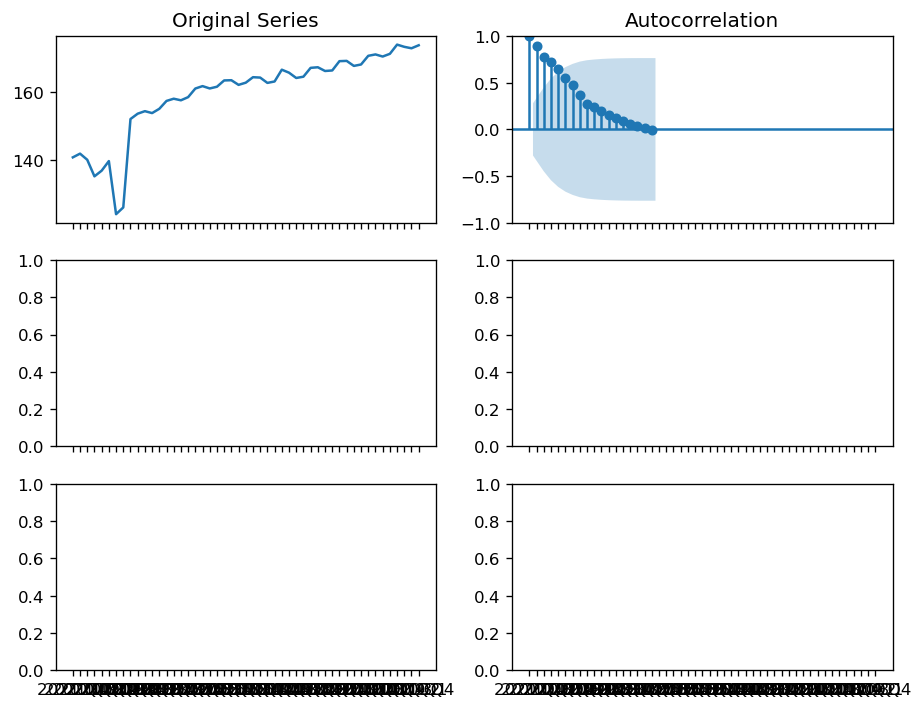

Text(0.5, 1.0, '1st Order Differencing')

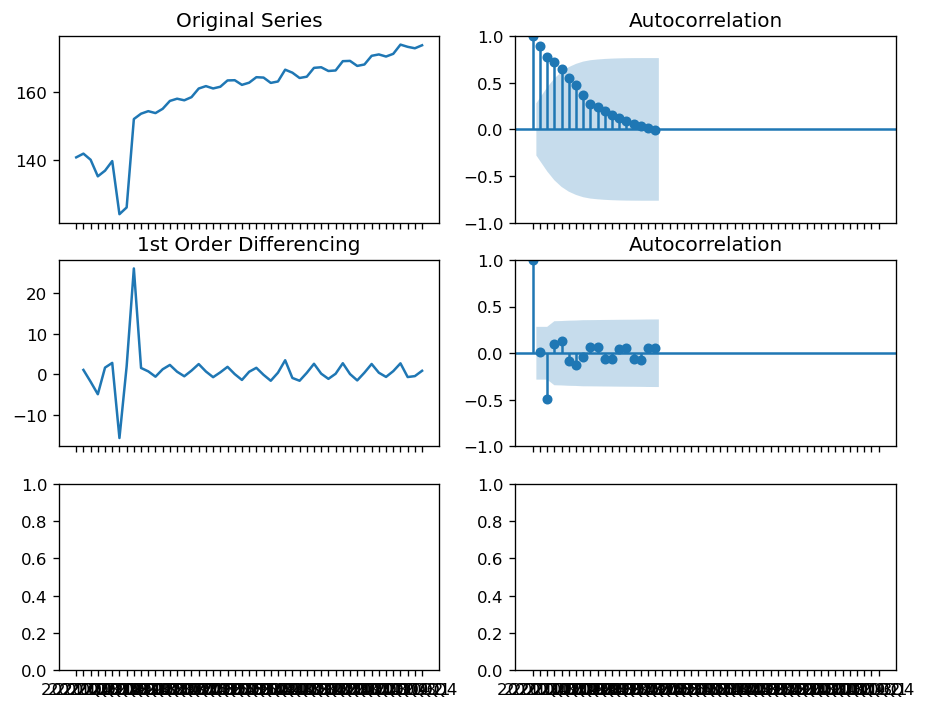

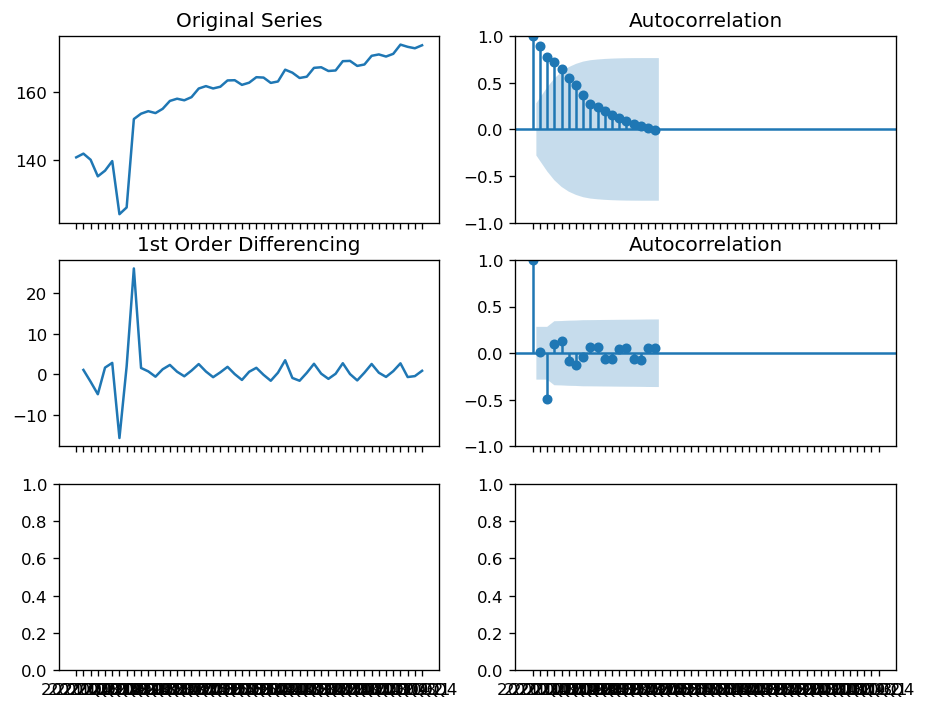

In [32]:
# Original Series
fig, axes = plt.subplots (3,2, sharex=True)
axes[0, 0].plot(uk_data['Great Britain']); axes[0, 0].set_title('Original Series')
plot_acf(uk_data['Great Britain'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(uk_data['Great Britain'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(uk_data['Great Britain'].diff().dropna(), ax=axes[1, 1])


plt.show()

Text(0.5, 1.0, '1st Differencing')

[(0.0, 5.0)]

/Users/songderi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


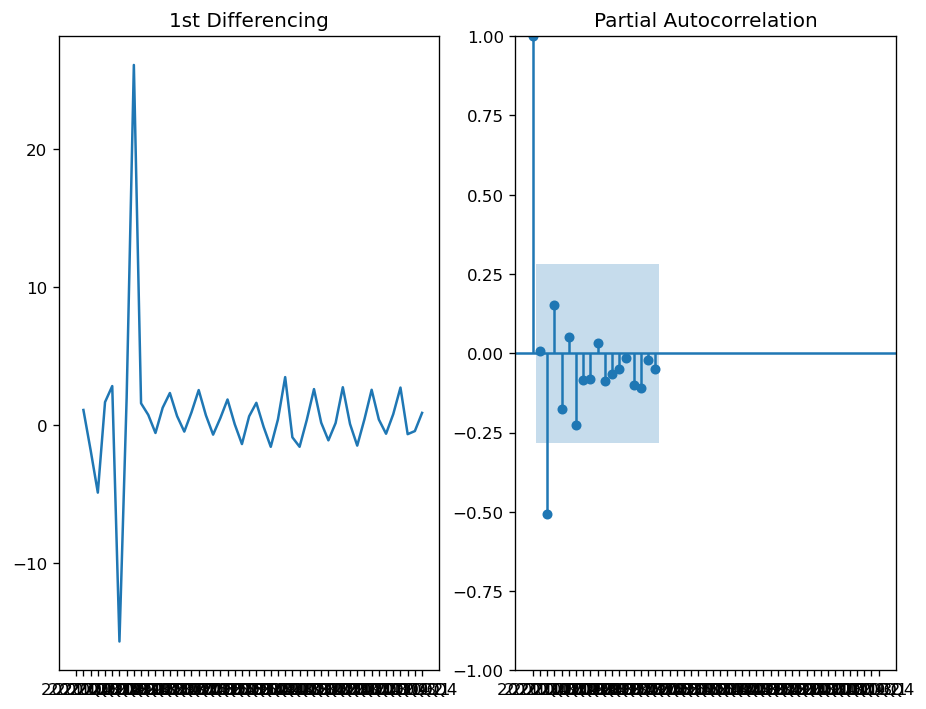

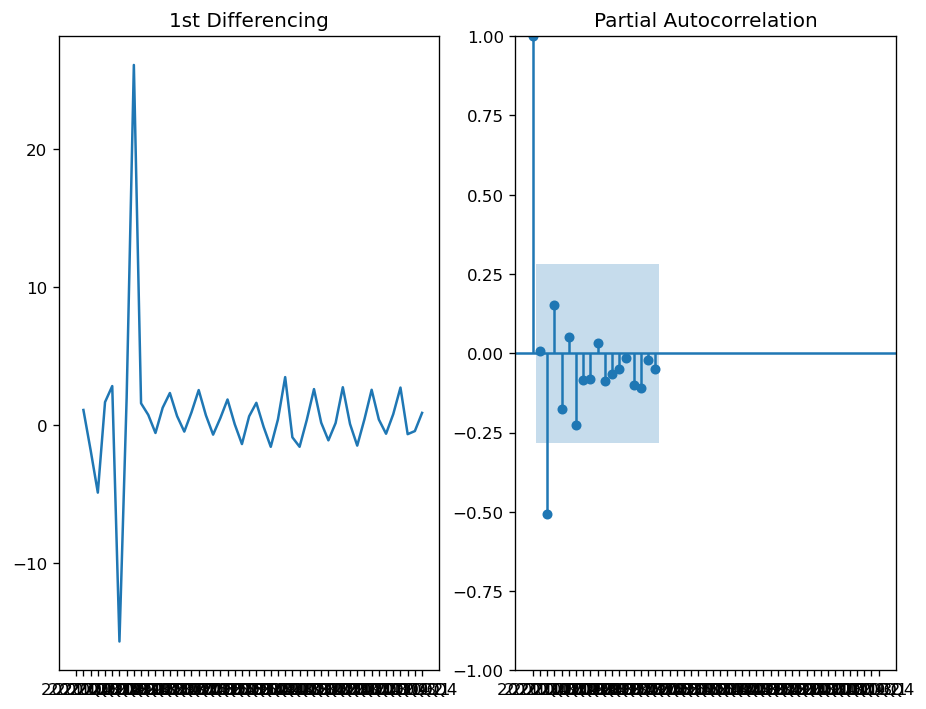

In [33]:
# PACF plot of 1st differenced series

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(uk_data['Great Britain'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(uk_data['Great Britain'].diff().dropna(), ax=axes[1])

plt.show()

Text(0.5, 1.0, '1st Differencing')

[(0.0, 1.2)]

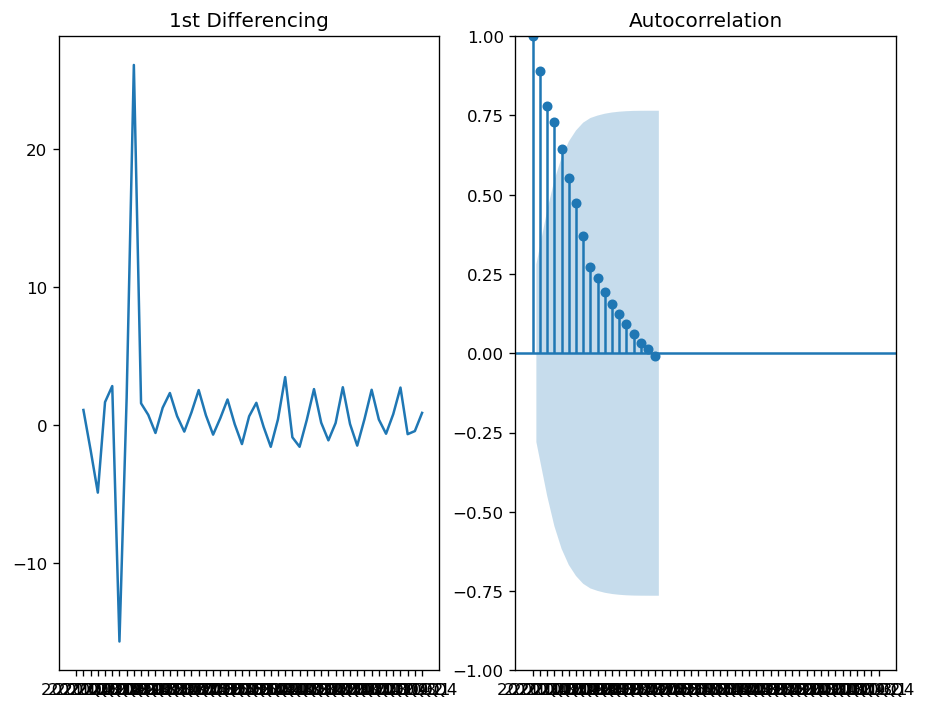

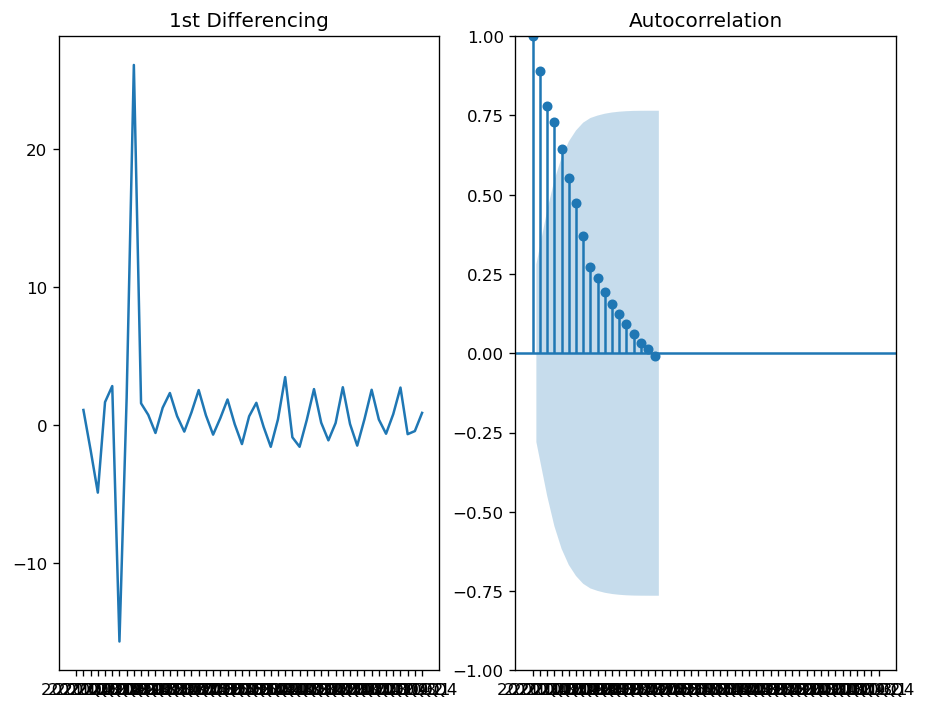

In [34]:
# ACF plot of 1st differenced series

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(uk_data['Great Britain'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(uk_data['Great Britain'].dropna(), ax=axes[1])

plt.show()

In [35]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(uk_data['Great Britain'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          Great Britain   No. Observations:                   49
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -138.496
Date:                Thu, 28 Jul 2022   AIC                            282.992
Time:                        14:21:28   BIC                            288.606
Sample:                             0   HQIC                           285.113
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5241      0.263     -1.991      0.047      -1.040      -0.008
ma.L1          0.8718      0.311      2.802      0.005       0.262       1.481
sigma2        18.5746      3.447      5.389      0.0

/Users/songderi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/songderi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/songderi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:title={'center':'Residuals'}>

<AxesSubplot:title={'center':'Density'}, ylabel='Density'>

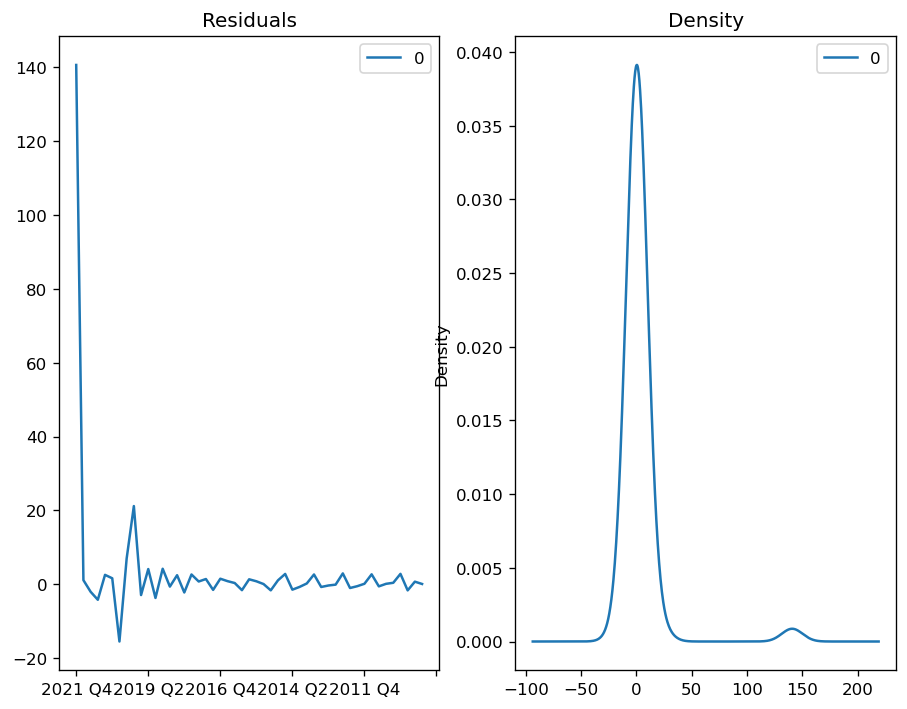

In [36]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

NameError: name 'y_pred' is not defined

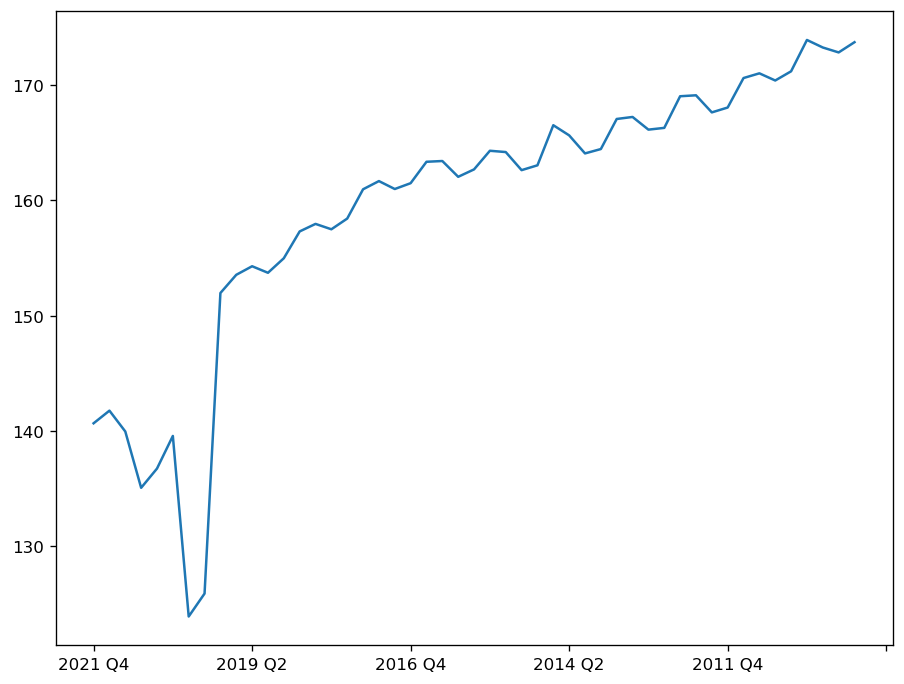

In [37]:
# Actual vs Fitted
ax = uk_data['Great Britain'].plot()
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('UK Charger Growth Prediction')

### 1. Linear Regression Model


In [3]:
df_1 = pd.read_excel('/Users/songderi/Desktop/dissertation project/data/charger_data_april.xlsx')
df_1

,LA / Region Code,Local Authority / Region Name,2022-04-01 00:00:00,Unnamed: 3,2022-01-01 00:00:00,Unnamed: 5,2021-10-01 00:00:00,Unnamed: 7,2021-07-01 00:00:00,Unnamed: 9,...,2020-10-01 00:00:00,Unnamed: 15,2020-07-01 00:00:00,Unnamed: 17,2020-04-01 00:00:00,Unnamed: 19,2020-01-01 00:00:00,Unnamed: 21,2019-10-01 00:00:00,Unnamed: 23
0,NaN,NaN,Total devices,"per 100,000 population",Total devices,"per 100,000 population",Total devices,"per 100,000 population",Total devices,"per 100,000 population",...,Total devices,"per 100,000 population",Total devices,"per 100,000 population",Total devices,"per 100,000 population",Total devices,"per 100,000 population",Total devices,"per 100,000 population"
1,K02000001,UNITED KINGDOM,30290,45.154208,28375,42.29946,25927,38.650154,24374,36.33505,...,19487,29.17355,18265,27.33963,17947,27.014151,16505,24.843627,15116,22.752879
2,K03000001,GREAT BRITAIN,29942,45.93337,28030,43.000213,25595,39.264732,24044,36.885377,...,19169,29.534781,17953,27.656597,17642,27.329096,16210,25.110795,14821,22.959105
3,E92000001,ENGLAND,25884,45.771772,24159,42.721381,21925,38.770905,20563,36.362422,...,16456,29.235901,15395,27.345587,14979,26.75912,13719,24.508202,12549,22.418065
4,E12000001,NORTH EAST,1011,37.713144,975,36.370242,916,34.169376,887,33.087595,...,849,31.798455,812,30.412657,786,29.572119,752,28.292917,738,27.766188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,N09000006,Fermanagh and Omagh,38,32.385352,39,33.237598,38,32.385352,38,32.385352,...,38,32.3688,38,32.3688,38,32.5245,38,32.5245,38,32.5245
426,N09000007,Lisburn and Castlereagh,16,10.925081,16,10.925081,17,11.607899,16,10.925081,...,11,7.534143,11,7.534143,11,7.618731,11,7.618731,11,7.618731
427,N09000008,Mid and East Antrim,25,17.928473,25,17.928473,24,17.211334,28,20.079889,...,27,19.386246,27,19.386246,25,18.015032,25,18.015032,24,18.735633
428,N09000009,Mid Ulster,24,16.112465,24,16.112465,24,16.112465,24,16.112465,...,22,14.812022,22,14.812022,22,14.926183,22,14.926183,23,14.926183


In [4]:
print(df_1.columns)

Index([             'LA / Region Code', 'Local Authority / Region Name',
                   2022-04-01 00:00:00,                    'Unnamed: 3',
                   2022-01-01 00:00:00,                    'Unnamed: 5',
                   2021-10-01 00:00:00,                    'Unnamed: 7',
                   2021-07-01 00:00:00,                    'Unnamed: 9',
                   2021-04-01 00:00:00,                   'Unnamed: 11',
                   2021-01-01 00:00:00,                   'Unnamed: 13',
                   2020-10-01 00:00:00,                   'Unnamed: 15',
                   2020-07-01 00:00:00,                   'Unnamed: 17',
                   2020-04-01 00:00:00,                   'Unnamed: 19',
                   2020-01-01 00:00:00,                   'Unnamed: 21',
                   2019-10-01 00:00:00,                   'Unnamed: 23'],
      dtype='object')


In [5]:
#switching the column names from datetime to strings
import datetime

mapper = lambda x: x.strftime("%Y-%m-%d") if isinstance(x, datetime.datetime) else x
df_1.columns = df_1.columns.map(mapper)

In [6]:
#check columns names
print(df_1.columns)

Index(['LA / Region Code', 'Local Authority / Region Name', '2022-04-01',
       'Unnamed: 3', '2022-01-01', 'Unnamed: 5', '2021-10-01', 'Unnamed: 7',
       '2021-07-01', 'Unnamed: 9', '2021-04-01', 'Unnamed: 11', '2021-01-01',
       'Unnamed: 13', '2020-10-01', 'Unnamed: 15', '2020-07-01', 'Unnamed: 17',
       '2020-04-01', 'Unnamed: 19', '2020-01-01', 'Unnamed: 21', '2019-10-01',
       'Unnamed: 23'],
      dtype='object')


In [7]:
#slice 
df_2 = df_1[['Local Authority / Region Name','2022-04-01','2022-01-01','2021-10-01','2021-07-01',
            '2021-04-01', '2021-01-01', '2020-10-01', '2020-07-01', '2020-04-01',  '2020-01-01','2019-10-01']]
df_2

,Local Authority / Region Name,2022-04-01,2022-01-01,2021-10-01,2021-07-01,2021-04-01,2021-01-01,2020-10-01,2020-07-01,2020-04-01,2020-01-01,2019-10-01
0,NaN,Total devices,Total devices,Total devices,Total devices,Total devices,Total devices,Total devices,Total devices,Total devices,Total devices,Total devices
1,UNITED KINGDOM,30290,28375,25927,24374,22790,20775,19487,18265,17947,16505,15116
2,GREAT BRITAIN,29942,28030,25595,24044,22463,20455,19169,17953,17642,16210,14821
3,ENGLAND,25884,24159,21925,20563,19261,17459,16456,15395,14979,13719,12549
4,NORTH EAST,1011,975,916,887,854,820,849,812,786,752,738
...,...,...,...,...,...,...,...,...,...,...,...,...
425,Fermanagh and Omagh,38,39,38,38,38,38,38,38,38,38,38
426,Lisburn and Castlereagh,16,16,17,16,16,11,11,11,11,11,11
427,Mid and East Antrim,25,25,24,28,27,27,27,27,25,25,24
428,Mid Ulster,24,24,24,24,23,22,22,22,22,22,23


In [8]:
#drop the first row
df_2 = df_2.iloc[1:,:]
#transpose the dataset
df_2 = df_2.transpose()
#make the first row as column names
df_2 = df_2.rename(columns=df_2.iloc[0])
#check the dataset
df_2

,UNITED KINGDOM,GREAT BRITAIN,ENGLAND,NORTH EAST,County Durham,Darlington,Hartlepool,Middlesbrough,Northumberland,Redcar and Cleveland,...,Ards and North Down,"Armagh City, Banbridge and Craigavon",Belfast,Causeway Coast and Glens,Derry City and Strabane,Fermanagh and Omagh,Lisburn and Castlereagh,Mid and East Antrim,Mid Ulster,"Newry, Mourne and Down"
Local Authority / Region Name,UNITED KINGDOM,GREAT BRITAIN,ENGLAND,NORTH EAST,County Durham,Darlington,Hartlepool,Middlesbrough,Northumberland,Redcar and Cleveland,...,Ards and North Down,"Armagh City, Banbridge and Craigavon",Belfast,Causeway Coast and Glens,Derry City and Strabane,Fermanagh and Omagh,Lisburn and Castlereagh,Mid and East Antrim,Mid Ulster,"Newry, Mourne and Down"
2022-04-01,30290,29942,25884,1011,149,31,12,34,198,36,...,20,35,55,34,27,38,16,25,24,35
2022-01-01,28375,28030,24159,975,128,30,13,32,197,36,...,21,34,53,33,27,39,16,25,24,34
2021-10-01,25927,25595,21925,916,124,31,11,30,186,34,...,19,31,53,31,27,38,17,24,24,31
2021-07-01,24374,24044,20563,887,116,31,10,30,172,32,...,19,31,52,28,26,38,16,28,24,31
2021-04-01,22790,22463,19261,854,121,29,9,30,153,26,...,18,30,53,29,26,38,16,27,23,31
2021-01-01,20775,20455,17459,820,110,29,8,30,149,24,...,18,30,51,29,27,38,11,27,22,31
2020-10-01,19487,19169,16456,849,106,29,6,29,162,24,...,17,30,49,32,27,38,11,27,22,31
2020-07-01,18265,17953,15395,812,105,28,6,29,152,20,...,17,30,47,28,27,38,11,27,22,31
2020-04-01,17947,17642,14979,786,102,28,6,29,149,20,...,17,30,47,27,24,38,11,25,22,31


In [9]:
#drop the first row
df_2 = df_2.iloc[1:,:]
df_2

,UNITED KINGDOM,GREAT BRITAIN,ENGLAND,NORTH EAST,County Durham,Darlington,Hartlepool,Middlesbrough,Northumberland,Redcar and Cleveland,...,Ards and North Down,"Armagh City, Banbridge and Craigavon",Belfast,Causeway Coast and Glens,Derry City and Strabane,Fermanagh and Omagh,Lisburn and Castlereagh,Mid and East Antrim,Mid Ulster,"Newry, Mourne and Down"
2022-04-01,30290,29942,25884,1011,149,31,12,34,198,36,...,20,35,55,34,27,38,16,25,24,35
2022-01-01,28375,28030,24159,975,128,30,13,32,197,36,...,21,34,53,33,27,39,16,25,24,34
2021-10-01,25927,25595,21925,916,124,31,11,30,186,34,...,19,31,53,31,27,38,17,24,24,31
2021-07-01,24374,24044,20563,887,116,31,10,30,172,32,...,19,31,52,28,26,38,16,28,24,31
2021-04-01,22790,22463,19261,854,121,29,9,30,153,26,...,18,30,53,29,26,38,16,27,23,31
2021-01-01,20775,20455,17459,820,110,29,8,30,149,24,...,18,30,51,29,27,38,11,27,22,31
2020-10-01,19487,19169,16456,849,106,29,6,29,162,24,...,17,30,49,32,27,38,11,27,22,31
2020-07-01,18265,17953,15395,812,105,28,6,29,152,20,...,17,30,47,28,27,38,11,27,22,31
2020-04-01,17947,17642,14979,786,102,28,6,29,149,20,...,17,30,47,27,24,38,11,25,22,31
2020-01-01,16505,16210,13719,752,96,27,5,27,138,17,...,17,30,42,23,23,38,11,25,22,31


In [10]:
#reverse the oberservation into a chronological order
df_2 = df_2[::-1]
df_2


,UNITED KINGDOM,GREAT BRITAIN,ENGLAND,NORTH EAST,County Durham,Darlington,Hartlepool,Middlesbrough,Northumberland,Redcar and Cleveland,...,Ards and North Down,"Armagh City, Banbridge and Craigavon",Belfast,Causeway Coast and Glens,Derry City and Strabane,Fermanagh and Omagh,Lisburn and Castlereagh,Mid and East Antrim,Mid Ulster,"Newry, Mourne and Down"
2019-10-01,15116,14821,12549,738,92,27,5,25,139,17,...,17,30,42,23,23,38,11,24,23,31
2020-01-01,16505,16210,13719,752,96,27,5,27,138,17,...,17,30,42,23,23,38,11,25,22,31
2020-04-01,17947,17642,14979,786,102,28,6,29,149,20,...,17,30,47,27,24,38,11,25,22,31
2020-07-01,18265,17953,15395,812,105,28,6,29,152,20,...,17,30,47,28,27,38,11,27,22,31
2020-10-01,19487,19169,16456,849,106,29,6,29,162,24,...,17,30,49,32,27,38,11,27,22,31
2021-01-01,20775,20455,17459,820,110,29,8,30,149,24,...,18,30,51,29,27,38,11,27,22,31
2021-04-01,22790,22463,19261,854,121,29,9,30,153,26,...,18,30,53,29,26,38,16,27,23,31
2021-07-01,24374,24044,20563,887,116,31,10,30,172,32,...,19,31,52,28,26,38,16,28,24,31
2021-10-01,25927,25595,21925,916,124,31,11,30,186,34,...,19,31,53,31,27,38,17,24,24,31
2022-01-01,28375,28030,24159,975,128,30,13,32,197,36,...,21,34,53,33,27,39,16,25,24,34


In [11]:
#add two more rows into the dataset
new_row_1 = {}
new_row_2 = {}
df_2 = df_2.append(new_row_1, ignore_index = True)
df_2 = df_2.append(new_row_2, ignore_index = True)
df_2

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1190181269.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(new_row_1, ignore_index = True)
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1190181269.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_2 = df_2.append(new_row_1, ignore_index = True)
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1190181269.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(new_row_2, ignore_index = True)
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1190181269.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64

,UNITED KINGDOM,GREAT BRITAIN,ENGLAND,NORTH EAST,County Durham,Darlington,Hartlepool,Middlesbrough,Northumberland,Redcar and Cleveland,...,Ards and North Down,"Armagh City, Banbridge and Craigavon",Belfast,Causeway Coast and Glens,Derry City and Strabane,Fermanagh and Omagh,Lisburn and Castlereagh,Mid and East Antrim,Mid Ulster,"Newry, Mourne and Down"
0,15116,14821,12549,738,92,27,5,25,139,17,...,17,30,42,23,23,38,11,24,23,31
1,16505,16210,13719,752,96,27,5,27,138,17,...,17,30,42,23,23,38,11,25,22,31
2,17947,17642,14979,786,102,28,6,29,149,20,...,17,30,47,27,24,38,11,25,22,31
3,18265,17953,15395,812,105,28,6,29,152,20,...,17,30,47,28,27,38,11,27,22,31
4,19487,19169,16456,849,106,29,6,29,162,24,...,17,30,49,32,27,38,11,27,22,31
5,20775,20455,17459,820,110,29,8,30,149,24,...,18,30,51,29,27,38,11,27,22,31
6,22790,22463,19261,854,121,29,9,30,153,26,...,18,30,53,29,26,38,16,27,23,31
7,24374,24044,20563,887,116,31,10,30,172,32,...,19,31,52,28,26,38,16,28,24,31
8,25927,25595,21925,916,124,31,11,30,186,34,...,19,31,53,31,27,38,17,24,24,31
9,28375,28030,24159,975,128,30,13,32,197,36,...,21,34,53,33,27,39,16,25,24,34


In [16]:
#create the dependent variable
Time = np.arange(1,14)
#add the column to df_2
df_2['Time'] = Time
df_2

,UNITED KINGDOM,GREAT BRITAIN,ENGLAND,NORTH EAST,County Durham,Darlington,Hartlepool,Middlesbrough,Northumberland,Redcar and Cleveland,...,"Armagh City, Banbridge and Craigavon",Belfast,Causeway Coast and Glens,Derry City and Strabane,Fermanagh and Omagh,Lisburn and Castlereagh,Mid and East Antrim,Mid Ulster,"Newry, Mourne and Down",Time
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-01,15116,14821,12549,738,92,27,5,25,139,17,...,30,42,23,23,38,11,24,23,31,1
2020-01-01,16505,16210,13719,752,96,27,5,27,138,17,...,30,42,23,23,38,11,25,22,31,2
2020-04-01,17947,17642,14979,786,102,28,6,29,149,20,...,30,47,27,24,38,11,25,22,31,3
2020-07-01,18265,17953,15395,812,105,28,6,29,152,20,...,30,47,28,27,38,11,27,22,31,4
2020-10-01,19487,19169,16456,849,106,29,6,29,162,24,...,30,49,32,27,38,11,27,22,31,5
2021-01-01,20775,20455,17459,820,110,29,8,30,149,24,...,30,51,29,27,38,11,27,22,31,6
2021-04-01,22790,22463,19261,854,121,29,9,30,153,26,...,30,53,29,26,38,16,27,23,31,7
2021-07-01,24374,24044,20563,887,116,31,10,30,172,32,...,31,52,28,26,38,16,28,24,31,8
2021-10-01,25927,25595,21925,916,124,31,11,30,186,34,...,31,53,31,27,38,17,24,24,31,9


In [17]:
#reset the index with date
df_2['Date'] = ['2019-10-01','2020-01-01','2020-04-01','2020-07-01','2020-10-01','2021-01-01',
            '2021-04-01','2021-07-01','2021-10-01','2022-01-01','2022-04-01','2022-07-01','2022-10-01']

#make date time stamp
df_2['Date'] = pd.to_datetime(df_2['Date'])

#reindex
df_2 = df_2.set_index('Date')
df_2

,UNITED KINGDOM,GREAT BRITAIN,ENGLAND,NORTH EAST,County Durham,Darlington,Hartlepool,Middlesbrough,Northumberland,Redcar and Cleveland,...,"Armagh City, Banbridge and Craigavon",Belfast,Causeway Coast and Glens,Derry City and Strabane,Fermanagh and Omagh,Lisburn and Castlereagh,Mid and East Antrim,Mid Ulster,"Newry, Mourne and Down",Time
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-01,15116,14821,12549,738,92,27,5,25,139,17,...,30,42,23,23,38,11,24,23,31,1
2020-01-01,16505,16210,13719,752,96,27,5,27,138,17,...,30,42,23,23,38,11,25,22,31,2
2020-04-01,17947,17642,14979,786,102,28,6,29,149,20,...,30,47,27,24,38,11,25,22,31,3
2020-07-01,18265,17953,15395,812,105,28,6,29,152,20,...,30,47,28,27,38,11,27,22,31,4
2020-10-01,19487,19169,16456,849,106,29,6,29,162,24,...,30,49,32,27,38,11,27,22,31,5
2021-01-01,20775,20455,17459,820,110,29,8,30,149,24,...,30,51,29,27,38,11,27,22,31,6
2021-04-01,22790,22463,19261,854,121,29,9,30,153,26,...,30,53,29,26,38,16,27,23,31,7
2021-07-01,24374,24044,20563,887,116,31,10,30,172,32,...,31,52,28,26,38,16,28,24,31,8
2021-10-01,25927,25595,21925,916,124,31,11,30,186,34,...,31,53,31,27,38,17,24,24,31,9


In [20]:
# Training data
X = df_2.loc['2021', ['Time']]  # features
y = df_2.loc['2021', 'GREAT BRITAIN']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
X_pred = df_2.loc[:, ['Time']]
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

LinearRegression()

Date
2019-10-01    12088.6
2020-01-01    13788.7
2020-04-01    15488.8
2020-07-01    17188.9
2020-10-01    18889.0
2021-01-01    20589.1
2021-04-01    22289.2
2021-07-01    23989.3
2021-10-01    25689.4
2022-01-01    27389.5
2022-04-01    29089.6
2022-07-01    30789.7
2022-10-01    32489.8
dtype: float64

Text(0.5, 1.0, 'UK Charger Growth Prediction')

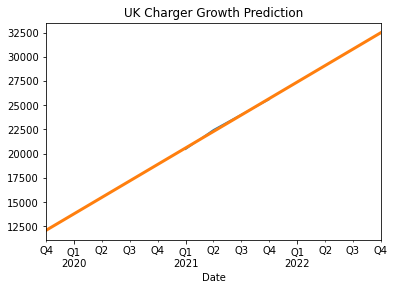

In [21]:
#plotting the graph
ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('UK Charger Growth Prediction')

### 2. Model Testing

In [22]:
df_pred = df_2[['UNITED KINGDOM','GREAT BRITAIN','ENGLAND','NORTH EAST',
               'NORTH WEST','YORKSHIRE AND THE HUMBER','EAST MIDLANDS',
               'WEST MIDLANDS','EAST OF ENGLAND','LONDON','SOUTH EAST',
               'SOUTH WEST','WALES','SCOTLAND','NORTHERN IRELAND']]
df_pred

,UNITED KINGDOM,GREAT BRITAIN,ENGLAND,NORTH EAST,NORTH WEST,YORKSHIRE AND THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,WALES,SCOTLAND,NORTHERN IRELAND
Date,,,,,,,,,,,,,,,
2019-10-01,15116,14821,12549,738,1204,664,743,815,909,4360,1966,1150,529,1743,295
2020-01-01,16505,16210,13719,752,1279,775,862,891,963,4773,2143,1281,569,1922,295
2020-04-01,17947,17642,14979,786,1412,900,925,984,1069,5069,2437,1397,623,2040,305
2020-07-01,18265,17953,15395,812,1476,951,962,1030,1119,5151,2478,1416,648,1910,312
2020-10-01,19487,19169,16456,849,1403,996,1029,1141,1229,5655,2649,1505,675,2038,318
2021-01-01,20775,20455,17459,820,1410,1056,1090,1215,1289,6155,2869,1555,804,2192,320
2021-04-01,22790,22463,19261,854,1513,1127,1176,1319,1394,7180,3056,1642,851,2351,327
2021-07-01,24374,24044,20563,887,1620,1156,1280,1591,1569,7489,3254,1717,916,2565,330
2021-10-01,25927,25595,21925,916,1725,1327,1413,1723,1667,7865,3416,1873,994,2676,332


In [23]:
# creating the first order differencing data
df_1st_diff = df_pred.diff()
#fill the first row with backward filling because it will be null
df_1st_diff.bfill(inplace = True)
#check the dataset
df_1st_diff

,UNITED KINGDOM,GREAT BRITAIN,ENGLAND,NORTH EAST,NORTH WEST,YORKSHIRE AND THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,WALES,SCOTLAND,NORTHERN IRELAND
Date,,,,,,,,,,,,,,,
2019-10-01,1389.0,1389.0,1170.0,14.0,75.0,111.0,119.0,76.0,54.0,413.0,177.0,131.0,40.0,179.0,0.0
2020-01-01,1389.0,1389.0,1170.0,14.0,75.0,111.0,119.0,76.0,54.0,413.0,177.0,131.0,40.0,179.0,0.0
2020-04-01,1442.0,1432.0,1260.0,34.0,133.0,125.0,63.0,93.0,106.0,296.0,294.0,116.0,54.0,118.0,10.0
2020-07-01,318.0,311.0,416.0,26.0,64.0,51.0,37.0,46.0,50.0,82.0,41.0,19.0,25.0,-130.0,7.0
2020-10-01,1222.0,1216.0,1061.0,37.0,-73.0,45.0,67.0,111.0,110.0,504.0,171.0,89.0,27.0,128.0,6.0
2021-01-01,1288.0,1286.0,1003.0,-29.0,7.0,60.0,61.0,74.0,60.0,500.0,220.0,50.0,129.0,154.0,2.0
2021-04-01,2015.0,2008.0,1802.0,34.0,103.0,71.0,86.0,104.0,105.0,1025.0,187.0,87.0,47.0,159.0,7.0
2021-07-01,1584.0,1581.0,1302.0,33.0,107.0,29.0,104.0,272.0,175.0,309.0,198.0,75.0,65.0,214.0,3.0
2021-10-01,1553.0,1551.0,1362.0,29.0,105.0,171.0,133.0,132.0,98.0,376.0,162.0,156.0,78.0,111.0,2.0


In [24]:
#get the growth rate 
df_growth_rate = df_pred.pct_change()
#backward fill the the first row
df_growth_rate.bfill(inplace = True)
#check the dataset 
df_growth_rate

,UNITED KINGDOM,GREAT BRITAIN,ENGLAND,NORTH EAST,NORTH WEST,YORKSHIRE AND THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,WALES,SCOTLAND,NORTHERN IRELAND
Date,,,,,,,,,,,,,,,
2019-10-01,0.091889,0.093718,0.093235,0.018970,0.062292,0.167169,0.160162,0.093252,0.059406,0.094725,0.090031,0.113913,0.075614,0.102697,0.000000
2020-01-01,0.091889,0.093718,0.093235,0.018970,0.062292,0.167169,0.160162,0.093252,0.059406,0.094725,0.090031,0.113913,0.075614,0.102697,0.000000
2020-04-01,0.087367,0.088341,0.091843,0.045213,0.103987,0.161290,0.073086,0.104377,0.110073,0.062016,0.137191,0.090554,0.094903,0.061394,0.033898
2020-07-01,0.017719,0.017628,0.027772,0.033079,0.045326,0.056667,0.040000,0.046748,0.046773,0.016177,0.016824,0.013601,0.040128,-0.063725,0.022951
2020-10-01,0.066904,0.067732,0.068918,0.045567,-0.049458,0.047319,0.069647,0.107767,0.098302,0.097845,0.069007,0.062853,0.041667,0.067016,0.019231
2021-01-01,0.066095,0.067087,0.060950,-0.034158,0.004989,0.060241,0.059281,0.064855,0.048820,0.088417,0.083050,0.033223,0.191111,0.075564,0.006289
2021-04-01,0.096992,0.098167,0.103213,0.041463,0.073050,0.067235,0.078899,0.085597,0.081458,0.166531,0.065180,0.055949,0.058458,0.072536,0.021875
2021-07-01,0.069504,0.070382,0.067598,0.038642,0.070720,0.025732,0.088435,0.206217,0.125538,0.043036,0.064791,0.045676,0.076381,0.091025,0.009174
2021-10-01,0.063715,0.064507,0.066235,0.032694,0.064815,0.147924,0.103906,0.082967,0.062460,0.050207,0.049785,0.090856,0.085153,0.043275,0.006061


In [25]:
#add the Time columns as dependant variable to the datasets
df_1st_diff['Time'] = Time
df_growth_rate['Time'] = Time
df_1st_diff
df_growth_rate

,UNITED KINGDOM,GREAT BRITAIN,ENGLAND,NORTH EAST,NORTH WEST,YORKSHIRE AND THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,WALES,SCOTLAND,NORTHERN IRELAND,Time
Date,,,,,,,,,,,,,,,,
2019-10-01,1389.0,1389.0,1170.0,14.0,75.0,111.0,119.0,76.0,54.0,413.0,177.0,131.0,40.0,179.0,0.0,1
2020-01-01,1389.0,1389.0,1170.0,14.0,75.0,111.0,119.0,76.0,54.0,413.0,177.0,131.0,40.0,179.0,0.0,2
2020-04-01,1442.0,1432.0,1260.0,34.0,133.0,125.0,63.0,93.0,106.0,296.0,294.0,116.0,54.0,118.0,10.0,3
2020-07-01,318.0,311.0,416.0,26.0,64.0,51.0,37.0,46.0,50.0,82.0,41.0,19.0,25.0,-130.0,7.0,4
2020-10-01,1222.0,1216.0,1061.0,37.0,-73.0,45.0,67.0,111.0,110.0,504.0,171.0,89.0,27.0,128.0,6.0,5
2021-01-01,1288.0,1286.0,1003.0,-29.0,7.0,60.0,61.0,74.0,60.0,500.0,220.0,50.0,129.0,154.0,2.0,6
2021-04-01,2015.0,2008.0,1802.0,34.0,103.0,71.0,86.0,104.0,105.0,1025.0,187.0,87.0,47.0,159.0,7.0,7
2021-07-01,1584.0,1581.0,1302.0,33.0,107.0,29.0,104.0,272.0,175.0,309.0,198.0,75.0,65.0,214.0,3.0,8
2021-10-01,1553.0,1551.0,1362.0,29.0,105.0,171.0,133.0,132.0,98.0,376.0,162.0,156.0,78.0,111.0,2.0,9


,UNITED KINGDOM,GREAT BRITAIN,ENGLAND,NORTH EAST,NORTH WEST,YORKSHIRE AND THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,WALES,SCOTLAND,NORTHERN IRELAND,Time
Date,,,,,,,,,,,,,,,,
2019-10-01,0.091889,0.093718,0.093235,0.018970,0.062292,0.167169,0.160162,0.093252,0.059406,0.094725,0.090031,0.113913,0.075614,0.102697,0.000000,1
2020-01-01,0.091889,0.093718,0.093235,0.018970,0.062292,0.167169,0.160162,0.093252,0.059406,0.094725,0.090031,0.113913,0.075614,0.102697,0.000000,2
2020-04-01,0.087367,0.088341,0.091843,0.045213,0.103987,0.161290,0.073086,0.104377,0.110073,0.062016,0.137191,0.090554,0.094903,0.061394,0.033898,3
2020-07-01,0.017719,0.017628,0.027772,0.033079,0.045326,0.056667,0.040000,0.046748,0.046773,0.016177,0.016824,0.013601,0.040128,-0.063725,0.022951,4
2020-10-01,0.066904,0.067732,0.068918,0.045567,-0.049458,0.047319,0.069647,0.107767,0.098302,0.097845,0.069007,0.062853,0.041667,0.067016,0.019231,5
2021-01-01,0.066095,0.067087,0.060950,-0.034158,0.004989,0.060241,0.059281,0.064855,0.048820,0.088417,0.083050,0.033223,0.191111,0.075564,0.006289,6
2021-04-01,0.096992,0.098167,0.103213,0.041463,0.073050,0.067235,0.078899,0.085597,0.081458,0.166531,0.065180,0.055949,0.058458,0.072536,0.021875,7
2021-07-01,0.069504,0.070382,0.067598,0.038642,0.070720,0.025732,0.088435,0.206217,0.125538,0.043036,0.064791,0.045676,0.076381,0.091025,0.009174,8
2021-10-01,0.063715,0.064507,0.066235,0.032694,0.064815,0.147924,0.103906,0.082967,0.062460,0.050207,0.049785,0.090856,0.085153,0.043275,0.006061,9


<AxesSubplot:xlabel='Date'>

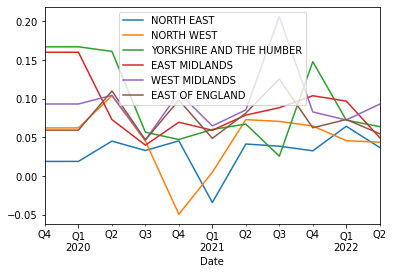

In [26]:
#check out the growth rates of chargers group 1
df_growth_rate.drop(['Time'], axis = 1).loc[:'2022-04-01',['NORTH EAST','NORTH WEST','YORKSHIRE AND THE HUMBER','EAST MIDLANDS','WEST MIDLANDS','EAST OF ENGLAND']].plot()

<AxesSubplot:xlabel='Date'>

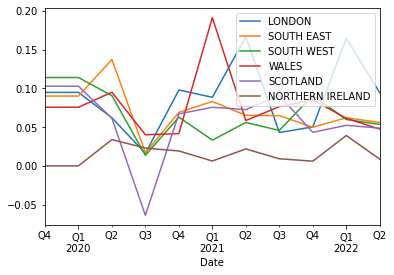

In [27]:
#check out the growth rates of chargers group 2
df_growth_rate.drop(['Time'], axis = 1).loc[:'2022-04-01',['LONDON','SOUTH EAST','SOUTH WEST','WALES','SCOTLAND','NORTHERN IRELAND']].plot()

In [35]:
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [36]:
# creating new dataframe from consumption column
data_UK_og = df_pred[['UNITED KINGDOM']]
# inserting new column with yesterday's consumption values
data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'UNITED KINGDOM'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
#backward fill the null rows
data_UK_og.bfill(inplace = True)
#check the dataset
data_UK_og

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/707063013.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'UNITED KINGDOM'].shift()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/707063013.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/707063013.py:8: SettingWithCopyWarning: 
A v

,UNITED KINGDOM,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,15116.0,15116.0,1389.0
2020-01-01,16505.0,15116.0,1389.0
2020-04-01,17947.0,16505.0,1389.0
2020-07-01,18265.0,17947.0,1442.0
2020-10-01,19487.0,18265.0,318.0
2021-01-01,20775.0,19487.0,1222.0
2021-04-01,22790.0,20775.0,1288.0
2021-07-01,24374.0,22790.0,2015.0
2021-10-01,25927.0,24374.0,1584.0


In [37]:
#slice the data
data_UK_pred = data_UK_og[:12]
data_UK_pred

,UNITED KINGDOM,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,15116.0,15116.0,1389.0
2020-01-01,16505.0,15116.0,1389.0
2020-04-01,17947.0,16505.0,1389.0
2020-07-01,18265.0,17947.0,1442.0
2020-10-01,19487.0,18265.0,318.0
2021-01-01,20775.0,19487.0,1222.0
2021-04-01,22790.0,20775.0,1288.0
2021-07-01,24374.0,22790.0,2015.0
2021-10-01,25927.0,24374.0,1584.0


In [38]:
#slice the data
data_UK = data_UK_og[:11]
data_UK

,UNITED KINGDOM,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,15116.0,15116.0,1389.0
2020-01-01,16505.0,15116.0,1389.0
2020-04-01,17947.0,16505.0,1389.0
2020-07-01,18265.0,17947.0,1442.0
2020-10-01,19487.0,18265.0,318.0
2021-01-01,20775.0,19487.0,1222.0
2021-04-01,22790.0,20775.0,1288.0
2021-07-01,24374.0,22790.0,2015.0
2021-10-01,25927.0,24374.0,1584.0


In [39]:
X_train = data_UK[:'2021'].drop(['UNITED KINGDOM'], axis = 1)
y_train = data_UK.loc[:'2021', 'UNITED KINGDOM']
X_test = data_UK['2022'].drop(['UNITED KINGDOM'], axis = 1)
y_test = data_UK.loc['2022', 'UNITED KINGDOM']

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/2862523925.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_UK['2022'].drop(['UNITED KINGDOM'], axis = 1)


LR: -1.794950 (2.757711)
NN: -21.209359 (31.067350)
RF: -22.034353 (14.166341)
SVR: -36.056192 (30.105045)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fcbd75a54c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcbd75a5a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcbd75a51f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fcbd75b0040>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcbd75b0310>,
 'means': []}

Text(0.5, 1.0, 'Algorithm Comparison')

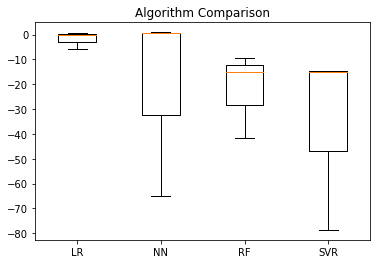

In [45]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('RF', RandomForestRegressor(n_estimators = 2))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=3)
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv,  scoring= 'r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [48]:
#fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the test set and check the result
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_true = y_test.values
regression_results(y_true, y_pred)

#predict the July value
X_pred = data_UK_pred['2022'].drop(['UNITED KINGDOM'], axis = 1)
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

LinearRegression()

explained_variance:  0.8863
mean_squared_log_error:  0.0002
r2:  0.8606
MAE:  322.7998
MSE:  127830.553
RMSE:  357.534


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/969052569.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_pred = data_UK_pred['2022'].drop(['UNITED KINGDOM'], axis = 1)


Date
2022-01-01    27898.476915
2022-04-01    30459.076478
2022-07-01    32698.251382
dtype: float64

In [49]:
#fit random forest regression model
model = RandomForestRegressor(n_estimators = 2)
model.fit(X_train, y_train)


y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_true = y_test.values
regression_results(y_true, y_pred)

#predict the July value
X_pred = data_UK_pred['2022'].drop(['UNITED KINGDOM'], axis = 1)
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

RandomForestRegressor(n_estimators=2)

explained_variance:  -0.9754
mean_squared_log_error:  0.0214
r2:  -16.6739
MAE:  3793.75
MSE:  16203582.125
RMSE:  4025.3673


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/3329894975.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_pred = data_UK_pred['2022'].drop(['UNITED KINGDOM'], axis = 1)


Date
2022-01-01    25927.0
2022-04-01    25150.5
2022-07-01    25150.5
dtype: float64

### 3. By Region Linear Regression Model and Forecast

#### 3.1  NORTH EAST


In [50]:
# creating new dataframe from consumption column
data_UK_og = df_pred[['NORTH EAST']]
# inserting new column with yesterday's consumption values
data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'NORTH EAST'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
#backward fill the null rows
data_UK_og.bfill(inplace = True)
#check the dataset
data_UK_og

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1305555891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'NORTH EAST'].shift()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1305555891.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1305555891.py:8: SettingWithCopyWarning: 
A va

,NORTH EAST,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,738.0,738.0,14.0
2020-01-01,752.0,738.0,14.0
2020-04-01,786.0,752.0,14.0
2020-07-01,812.0,786.0,34.0
2020-10-01,849.0,812.0,26.0
2021-01-01,820.0,849.0,37.0
2021-04-01,854.0,820.0,-29.0
2021-07-01,887.0,854.0,34.0
2021-10-01,916.0,887.0,33.0


In [51]:
#slice the data
data_UK_pred = data_UK_og[:12]
data_UK_pred
#slice the data
data_UK = data_UK_og[:11]
data_UK

,NORTH EAST,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,738.0,738.0,14.0
2020-01-01,752.0,738.0,14.0
2020-04-01,786.0,752.0,14.0
2020-07-01,812.0,786.0,34.0
2020-10-01,849.0,812.0,26.0
2021-01-01,820.0,849.0,37.0
2021-04-01,854.0,820.0,-29.0
2021-07-01,887.0,854.0,34.0
2021-10-01,916.0,887.0,33.0


,NORTH EAST,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,738.0,738.0,14.0
2020-01-01,752.0,738.0,14.0
2020-04-01,786.0,752.0,14.0
2020-07-01,812.0,786.0,34.0
2020-10-01,849.0,812.0,26.0
2021-01-01,820.0,849.0,37.0
2021-04-01,854.0,820.0,-29.0
2021-07-01,887.0,854.0,34.0
2021-10-01,916.0,887.0,33.0


In [52]:
X_train = data_UK[:'2021'].drop(['NORTH EAST'], axis = 1)
y_train = data_UK.loc[:'2021', 'NORTH EAST']
X_test = data_UK['2022'].drop(['NORTH EAST'], axis = 1)
y_test = data_UK.loc['2022', 'NORTH EAST']

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/3277899439.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_UK['2022'].drop(['NORTH EAST'], axis = 1)


In [53]:
#fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the test set and check the result
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_true = y_test.values
regression_results(y_true, y_pred)

#prediction
X_pred = data_UK_pred['2022'].drop(['NORTH EAST'], axis = 1)
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

LinearRegression()

explained_variance:  0.791
mean_squared_log_error:  0.0009
r2:  -1.6
MAE:  27.8329
MSE:  842.3957
RMSE:  29.0241


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/593191917.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_pred = data_UK_pred['2022'].drop(['NORTH EAST'], axis = 1)


Date
2022-01-01     938.937445
2022-04-01     991.396850
2022-07-01    1036.917373
dtype: float64

#### 3.2 NORTH WEST

In [54]:
# creating new dataframe from consumption column
data_UK_og = df_pred[['NORTH WEST']]
# inserting new column with yesterday's consumption values
data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'NORTH WEST'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
#backward fill the null rows
data_UK_og.bfill(inplace = True)
#check the dataset
data_UK_og

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/2629012401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'NORTH WEST'].shift()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/2629012401.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/2629012401.py:8: SettingWithCopyWarning: 
A va

,NORTH WEST,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,1204.0,1204.0,75.0
2020-01-01,1279.0,1204.0,75.0
2020-04-01,1412.0,1279.0,75.0
2020-07-01,1476.0,1412.0,133.0
2020-10-01,1403.0,1476.0,64.0
2021-01-01,1410.0,1403.0,-73.0
2021-04-01,1513.0,1410.0,7.0
2021-07-01,1620.0,1513.0,103.0
2021-10-01,1725.0,1620.0,107.0


In [55]:
#slice the data
data_UK_pred = data_UK_og[:12]
data_UK_pred
#slice the data
data_UK = data_UK_og[:11]
data_UK

,NORTH WEST,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,1204.0,1204.0,75.0
2020-01-01,1279.0,1204.0,75.0
2020-04-01,1412.0,1279.0,75.0
2020-07-01,1476.0,1412.0,133.0
2020-10-01,1403.0,1476.0,64.0
2021-01-01,1410.0,1403.0,-73.0
2021-04-01,1513.0,1410.0,7.0
2021-07-01,1620.0,1513.0,103.0
2021-10-01,1725.0,1620.0,107.0


,NORTH WEST,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,1204.0,1204.0,75.0
2020-01-01,1279.0,1204.0,75.0
2020-04-01,1412.0,1279.0,75.0
2020-07-01,1476.0,1412.0,133.0
2020-10-01,1403.0,1476.0,64.0
2021-01-01,1410.0,1403.0,-73.0
2021-04-01,1513.0,1410.0,7.0
2021-07-01,1620.0,1513.0,103.0
2021-10-01,1725.0,1620.0,107.0


In [56]:
X_train = data_UK[:'2021'].drop(['NORTH WEST'], axis = 1)
y_train = data_UK.loc[:'2021', 'NORTH WEST']
X_test = data_UK['2022'].drop(['NORTH WEST'], axis = 1)
y_test = data_UK.loc['2022', 'NORTH WEST']

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/3076025044.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_UK['2022'].drop(['NORTH WEST'], axis = 1)


In [57]:
#fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the test set and check the result
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_true = y_test.values
regression_results(y_true, y_pred)

#predict the July value
X_pred = data_UK_pred['2022'].drop(['NORTH WEST'], axis = 1)
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

LinearRegression()

explained_variance:  0.9938
mean_squared_log_error:  0.0
r2:  0.973
MAE:  5.7023
MSE:  42.1992
RMSE:  6.4961


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/3626982229.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_pred = data_UK_pred['2022'].drop(['NORTH WEST'], axis = 1)


Date
2022-01-01    1801.409408
2022-04-01    1874.185963
2022-07-01    1954.630121
dtype: float64

#### 3.3 YORKSHIRE AND THE HUMBER

In [58]:
# creating new dataframe from consumption column
data_UK_og = df_pred[['YORKSHIRE AND THE HUMBER']]
# inserting new column with yesterday's consumption values
data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'YORKSHIRE AND THE HUMBER'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
#backward fill the null rows
data_UK_og.bfill(inplace = True)
#check the dataset
data_UK_og

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1987666834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'YORKSHIRE AND THE HUMBER'].shift()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1987666834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1987666834.py:8: SettingWithCopy

,YORKSHIRE AND THE HUMBER,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,664.0,664.0,111.0
2020-01-01,775.0,664.0,111.0
2020-04-01,900.0,775.0,111.0
2020-07-01,951.0,900.0,125.0
2020-10-01,996.0,951.0,51.0
2021-01-01,1056.0,996.0,45.0
2021-04-01,1127.0,1056.0,60.0
2021-07-01,1156.0,1127.0,71.0
2021-10-01,1327.0,1156.0,29.0


In [59]:
#slice the data
data_UK_pred = data_UK_og[:12]
data_UK_pred
#slice the data
data_UK = data_UK_og[:11]
data_UK

,YORKSHIRE AND THE HUMBER,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,664.0,664.0,111.0
2020-01-01,775.0,664.0,111.0
2020-04-01,900.0,775.0,111.0
2020-07-01,951.0,900.0,125.0
2020-10-01,996.0,951.0,51.0
2021-01-01,1056.0,996.0,45.0
2021-04-01,1127.0,1056.0,60.0
2021-07-01,1156.0,1127.0,71.0
2021-10-01,1327.0,1156.0,29.0


,YORKSHIRE AND THE HUMBER,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,664.0,664.0,111.0
2020-01-01,775.0,664.0,111.0
2020-04-01,900.0,775.0,111.0
2020-07-01,951.0,900.0,125.0
2020-10-01,996.0,951.0,51.0
2021-01-01,1056.0,996.0,45.0
2021-04-01,1127.0,1056.0,60.0
2021-07-01,1156.0,1127.0,71.0
2021-10-01,1327.0,1156.0,29.0


In [60]:
X_train = data_UK[:'2021'].drop(['YORKSHIRE AND THE HUMBER'], axis = 1)
y_train = data_UK.loc[:'2021', 'YORKSHIRE AND THE HUMBER']
X_test = data_UK['2022'].drop(['YORKSHIRE AND THE HUMBER'], axis = 1)
y_test = data_UK.loc['2022', 'YORKSHIRE AND THE HUMBER']

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/929959761.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_UK['2022'].drop(['YORKSHIRE AND THE HUMBER'], axis = 1)


In [61]:
#fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the test set and check the result
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_true = y_test.values
regression_results(y_true, y_pred)

#predict the July value
X_pred = data_UK_pred['2022'].drop(['YORKSHIRE AND THE HUMBER'], axis = 1)
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

LinearRegression()

explained_variance:  0.8391
mean_squared_log_error:  0.0015
r2:  -0.4259
MAE:  51.1738
MSE:  2951.9452
RMSE:  54.3318


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/394288003.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_pred = data_UK_pred['2022'].drop(['YORKSHIRE AND THE HUMBER'], axis = 1)


Date
2022-01-01    1353.572801
2022-04-01    1481.079573
2022-07-01    1572.792112
dtype: float64

#### 3.4 EAST MIDLANDS	

In [62]:
# creating new dataframe from consumption column
data_UK_og = df_pred[['EAST MIDLANDS']]
# inserting new column with yesterday's consumption values
data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'EAST MIDLANDS'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
#backward fill the null rows
data_UK_og.bfill(inplace = True)
#check the dataset
data_UK_og

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/2457991433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'EAST MIDLANDS'].shift()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/2457991433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/2457991433.py:8: SettingWithCopyWarning: 
A

,EAST MIDLANDS,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,743.0,743.0,119.0
2020-01-01,862.0,743.0,119.0
2020-04-01,925.0,862.0,119.0
2020-07-01,962.0,925.0,63.0
2020-10-01,1029.0,962.0,37.0
2021-01-01,1090.0,1029.0,67.0
2021-04-01,1176.0,1090.0,61.0
2021-07-01,1280.0,1176.0,86.0
2021-10-01,1413.0,1280.0,104.0


In [63]:
#slice the data
data_UK_pred = data_UK_og[:12]
data_UK_pred
#slice the data
data_UK = data_UK_og[:11]
data_UK

,EAST MIDLANDS,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,743.0,743.0,119.0
2020-01-01,862.0,743.0,119.0
2020-04-01,925.0,862.0,119.0
2020-07-01,962.0,925.0,63.0
2020-10-01,1029.0,962.0,37.0
2021-01-01,1090.0,1029.0,67.0
2021-04-01,1176.0,1090.0,61.0
2021-07-01,1280.0,1176.0,86.0
2021-10-01,1413.0,1280.0,104.0


,EAST MIDLANDS,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,743.0,743.0,119.0
2020-01-01,862.0,743.0,119.0
2020-04-01,925.0,862.0,119.0
2020-07-01,962.0,925.0,63.0
2020-10-01,1029.0,962.0,37.0
2021-01-01,1090.0,1029.0,67.0
2021-04-01,1176.0,1090.0,61.0
2021-07-01,1280.0,1176.0,86.0
2021-10-01,1413.0,1280.0,104.0


In [64]:
X_train = data_UK[:'2021'].drop(['EAST MIDLANDS'], axis = 1)
y_train = data_UK.loc[:'2021', 'EAST MIDLANDS']
X_test = data_UK['2022'].drop(['EAST MIDLANDS'], axis = 1)
y_test = data_UK.loc['2022', 'EAST MIDLANDS']

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/2128060867.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_UK['2022'].drop(['EAST MIDLANDS'], axis = 1)


In [65]:
#fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the test set and check the result
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_true = y_test.values
regression_results(y_true, y_pred)

#predict the July value
X_pred = data_UK_pred['2022'].drop(['EAST MIDLANDS'], axis = 1)
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

LinearRegression()

explained_variance:  -0.1496
mean_squared_log_error:  0.0021
r2:  -3.0065
MAE:  65.075
MSE:  5938.6862
RMSE:  77.0629


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1039693816.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_pred = data_UK_pred['2022'].drop(['EAST MIDLANDS'], axis = 1)


Date
2022-01-01    1573.796313
2022-04-01    1733.353692
2022-07-01    1795.969815
dtype: float64

#### 3.5 WEST MIDLANDS

In [66]:
# creating new dataframe from consumption column
data_UK_og = df_pred[['WEST MIDLANDS']]
# inserting new column with yesterday's consumption values
data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'WEST MIDLANDS'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
#backward fill the null rows
data_UK_og.bfill(inplace = True)
#check the dataset
data_UK_og

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1855321037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'WEST MIDLANDS'].shift()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1855321037.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1855321037.py:8: SettingWithCopyWarning: 
A

,WEST MIDLANDS,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,815.0,815.0,76.0
2020-01-01,891.0,815.0,76.0
2020-04-01,984.0,891.0,76.0
2020-07-01,1030.0,984.0,93.0
2020-10-01,1141.0,1030.0,46.0
2021-01-01,1215.0,1141.0,111.0
2021-04-01,1319.0,1215.0,74.0
2021-07-01,1591.0,1319.0,104.0
2021-10-01,1723.0,1591.0,272.0


In [67]:
#slice the data
data_UK_pred = data_UK_og[:12]
data_UK_pred
#slice the data
data_UK = data_UK_og[:11]
data_UK

,WEST MIDLANDS,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,815.0,815.0,76.0
2020-01-01,891.0,815.0,76.0
2020-04-01,984.0,891.0,76.0
2020-07-01,1030.0,984.0,93.0
2020-10-01,1141.0,1030.0,46.0
2021-01-01,1215.0,1141.0,111.0
2021-04-01,1319.0,1215.0,74.0
2021-07-01,1591.0,1319.0,104.0
2021-10-01,1723.0,1591.0,272.0


,WEST MIDLANDS,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,815.0,815.0,76.0
2020-01-01,891.0,815.0,76.0
2020-04-01,984.0,891.0,76.0
2020-07-01,1030.0,984.0,93.0
2020-10-01,1141.0,1030.0,46.0
2021-01-01,1215.0,1141.0,111.0
2021-04-01,1319.0,1215.0,74.0
2021-07-01,1591.0,1319.0,104.0
2021-10-01,1723.0,1591.0,272.0


In [68]:
X_train = data_UK[:'2021'].drop(['WEST MIDLANDS'], axis = 1)
y_train = data_UK.loc[:'2021', 'WEST MIDLANDS']
X_test = data_UK['2022'].drop(['WEST MIDLANDS'], axis = 1)
y_test = data_UK.loc['2022', 'WEST MIDLANDS']

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/2286722312.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_UK['2022'].drop(['WEST MIDLANDS'], axis = 1)


In [69]:
#fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the test set and check the result
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_true = y_test.values
regression_results(y_true, y_pred)

#predict the July value
X_pred = data_UK_pred['2022'].drop(['WEST MIDLANDS'], axis = 1)
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

LinearRegression()

explained_variance:  1.0
mean_squared_log_error:  0.0069
r2:  -2.783
MAE:  167.2693
MSE:  27979.0953
RMSE:  167.2695


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/4028018237.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_pred = data_UK_pred['2022'].drop(['WEST MIDLANDS'], axis = 1)


Date
2022-01-01    2015.010055
2022-04-01    2187.528600
2022-07-01    2381.034516
dtype: float64

#### 3.6 EAST OF ENGLAND

In [70]:
# creating new dataframe from consumption column
data_UK_og = df_pred[['EAST OF ENGLAND']]
# inserting new column with yesterday's consumption values
data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'EAST OF ENGLAND'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
#backward fill the null rows
data_UK_og.bfill(inplace = True)
#check the dataset
data_UK_og

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/266669500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'EAST OF ENGLAND'].shift()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/266669500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/266669500.py:8: SettingWithCopyWarning: 
A 

,EAST OF ENGLAND,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,909.0,909.0,54.0
2020-01-01,963.0,909.0,54.0
2020-04-01,1069.0,963.0,54.0
2020-07-01,1119.0,1069.0,106.0
2020-10-01,1229.0,1119.0,50.0
2021-01-01,1289.0,1229.0,110.0
2021-04-01,1394.0,1289.0,60.0
2021-07-01,1569.0,1394.0,105.0
2021-10-01,1667.0,1569.0,175.0


In [71]:
#slice the data
data_UK_pred = data_UK_og[:12]
data_UK_pred
#slice the data
data_UK = data_UK_og[:11]
data_UK

,EAST OF ENGLAND,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,909.0,909.0,54.0
2020-01-01,963.0,909.0,54.0
2020-04-01,1069.0,963.0,54.0
2020-07-01,1119.0,1069.0,106.0
2020-10-01,1229.0,1119.0,50.0
2021-01-01,1289.0,1229.0,110.0
2021-04-01,1394.0,1289.0,60.0
2021-07-01,1569.0,1394.0,105.0
2021-10-01,1667.0,1569.0,175.0


,EAST OF ENGLAND,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,909.0,909.0,54.0
2020-01-01,963.0,909.0,54.0
2020-04-01,1069.0,963.0,54.0
2020-07-01,1119.0,1069.0,106.0
2020-10-01,1229.0,1119.0,50.0
2021-01-01,1289.0,1229.0,110.0
2021-04-01,1394.0,1289.0,60.0
2021-07-01,1569.0,1394.0,105.0
2021-10-01,1667.0,1569.0,175.0


In [72]:
X_train = data_UK[:'2021'].drop(['EAST OF ENGLAND'], axis = 1)
y_train = data_UK.loc[:'2021', 'EAST OF ENGLAND']
X_test = data_UK['2022'].drop(['EAST OF ENGLAND'], axis = 1)
y_test = data_UK.loc['2022', 'EAST OF ENGLAND']

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1515111947.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_UK['2022'].drop(['EAST OF ENGLAND'], axis = 1)


In [73]:
#fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the test set and check the result
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_true = y_test.values
regression_results(y_true, y_pred)

#predict the July value
X_pred = data_UK_pred['2022'].drop(['EAST OF ENGLAND'], axis = 1)
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

LinearRegression()

explained_variance:  0.877
mean_squared_log_error:  0.0028
r2:  -3.2826
MAE:  99.9353
MSE:  10282.4412
RMSE:  101.4024


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/3926918507.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_pred = data_UK_pred['2022'].drop(['EAST OF ENGLAND'], axis = 1)


Date
2022-01-01    1871.748882
2022-04-01    2004.121753
2022-07-01    2149.079481
dtype: float64

#### 3.7 LONDON

In [74]:
# creating new dataframe from consumption column
data_UK_og = df_pred[['LONDON']]
# inserting new column with yesterday's consumption values
data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'LONDON'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
#backward fill the null rows
data_UK_og.bfill(inplace = True)
#check the dataset
data_UK_og

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/3209980507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'LONDON'].shift()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/3209980507.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/3209980507.py:8: SettingWithCopyWarning: 
A value 

,LONDON,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,4360.0,4360.0,413.0
2020-01-01,4773.0,4360.0,413.0
2020-04-01,5069.0,4773.0,413.0
2020-07-01,5151.0,5069.0,296.0
2020-10-01,5655.0,5151.0,82.0
2021-01-01,6155.0,5655.0,504.0
2021-04-01,7180.0,6155.0,500.0
2021-07-01,7489.0,7180.0,1025.0
2021-10-01,7865.0,7489.0,309.0


In [75]:
#slice the data
data_UK_pred = data_UK_og[:12]
data_UK_pred
#slice the data
data_UK = data_UK_og[:11]
data_UK

,LONDON,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,4360.0,4360.0,413.0
2020-01-01,4773.0,4360.0,413.0
2020-04-01,5069.0,4773.0,413.0
2020-07-01,5151.0,5069.0,296.0
2020-10-01,5655.0,5151.0,82.0
2021-01-01,6155.0,5655.0,504.0
2021-04-01,7180.0,6155.0,500.0
2021-07-01,7489.0,7180.0,1025.0
2021-10-01,7865.0,7489.0,309.0


,LONDON,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,4360.0,4360.0,413.0
2020-01-01,4773.0,4360.0,413.0
2020-04-01,5069.0,4773.0,413.0
2020-07-01,5151.0,5069.0,296.0
2020-10-01,5655.0,5151.0,82.0
2021-01-01,6155.0,5655.0,504.0
2021-04-01,7180.0,6155.0,500.0
2021-07-01,7489.0,7180.0,1025.0
2021-10-01,7865.0,7489.0,309.0


In [76]:
X_train = data_UK[:'2021'].drop(['LONDON'], axis = 1)
y_train = data_UK.loc[:'2021', 'LONDON']
X_test = data_UK['2022'].drop(['LONDON'], axis = 1)
y_test = data_UK.loc['2022', 'LONDON']

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1874628623.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_UK['2022'].drop(['LONDON'], axis = 1)


In [77]:
#fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the test set and check the result
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_true = y_test.values
regression_results(y_true, y_pred)

#predict the July value
X_pred = data_UK_pred['2022'].drop(['LONDON'], axis = 1)
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

LinearRegression()

explained_variance:  0.7807
mean_squared_log_error:  0.0033
r2:  -0.4093
MAE:  470.7125
MSE:  262394.9859
RMSE:  512.245


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/2603036883.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_pred = data_UK_pred['2022'].drop(['LONDON'], axis = 1)


Date
2022-01-01     8484.236226
2022-04-01     9751.338733
2022-07-01    10766.824013
dtype: float64

#### 3.8 SOUTH EAST

In [78]:
# creating new dataframe from consumption column
data_UK_og = df_pred[['SOUTH EAST']]
# inserting new column with yesterday's consumption values
data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'SOUTH EAST'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
#backward fill the null rows
data_UK_og.bfill(inplace = True)
#check the dataset
data_UK_og

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1180403495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'SOUTH EAST'].shift()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1180403495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1180403495.py:8: SettingWithCopyWarning: 
A va

,SOUTH EAST,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,1966.0,1966.0,177.0
2020-01-01,2143.0,1966.0,177.0
2020-04-01,2437.0,2143.0,177.0
2020-07-01,2478.0,2437.0,294.0
2020-10-01,2649.0,2478.0,41.0
2021-01-01,2869.0,2649.0,171.0
2021-04-01,3056.0,2869.0,220.0
2021-07-01,3254.0,3056.0,187.0
2021-10-01,3416.0,3254.0,198.0


In [79]:
#slice the data
data_UK_pred = data_UK_og[:12]
data_UK_pred
#slice the data
data_UK = data_UK_og[:11]
data_UK

,SOUTH EAST,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,1966.0,1966.0,177.0
2020-01-01,2143.0,1966.0,177.0
2020-04-01,2437.0,2143.0,177.0
2020-07-01,2478.0,2437.0,294.0
2020-10-01,2649.0,2478.0,41.0
2021-01-01,2869.0,2649.0,171.0
2021-04-01,3056.0,2869.0,220.0
2021-07-01,3254.0,3056.0,187.0
2021-10-01,3416.0,3254.0,198.0


,SOUTH EAST,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,1966.0,1966.0,177.0
2020-01-01,2143.0,1966.0,177.0
2020-04-01,2437.0,2143.0,177.0
2020-07-01,2478.0,2437.0,294.0
2020-10-01,2649.0,2478.0,41.0
2021-01-01,2869.0,2649.0,171.0
2021-04-01,3056.0,2869.0,220.0
2021-07-01,3254.0,3056.0,187.0
2021-10-01,3416.0,3254.0,198.0


In [80]:
X_train = data_UK[:'2021'].drop(['SOUTH EAST'], axis = 1)
y_train = data_UK.loc[:'2021', 'SOUTH EAST']
X_test = data_UK['2022'].drop(['SOUTH EAST'], axis = 1)
y_test = data_UK.loc['2022', 'SOUTH EAST']

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/94582651.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_UK['2022'].drop(['SOUTH EAST'], axis = 1)


In [81]:
#fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the test set and check the result
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_true = y_test.values
regression_results(y_true, y_pred)

#predict the July value
X_pred = data_UK_pred['2022'].drop(['SOUTH EAST'], axis = 1)
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

LinearRegression()

explained_variance:  0.9998
mean_squared_log_error:  0.0
r2:  0.9986
MAE:  3.4555
MSE:  14.0489
RMSE:  3.7482


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1799624549.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_pred = data_UK_pred['2022'].drop(['SOUTH EAST'], axis = 1)


Date
2022-01-01    3632.907583
2022-04-01    3833.003341
2022-07-01    4050.842661
dtype: float64

#### 3.9 SOUTH WEST

In [82]:
# creating new dataframe from consumption column
data_UK_og = df_pred[['SOUTH WEST']]
# inserting new column with yesterday's consumption values
data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'SOUTH WEST'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
#backward fill the null rows
data_UK_og.bfill(inplace = True)
#check the dataset
data_UK_og

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1477083844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'SOUTH WEST'].shift()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1477083844.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1477083844.py:8: SettingWithCopyWarning: 
A va

,SOUTH WEST,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,1150.0,1150.0,131.0
2020-01-01,1281.0,1150.0,131.0
2020-04-01,1397.0,1281.0,131.0
2020-07-01,1416.0,1397.0,116.0
2020-10-01,1505.0,1416.0,19.0
2021-01-01,1555.0,1505.0,89.0
2021-04-01,1642.0,1555.0,50.0
2021-07-01,1717.0,1642.0,87.0
2021-10-01,1873.0,1717.0,75.0


In [83]:
#slice the data
data_UK_pred = data_UK_og[:12]
data_UK_pred
#slice the data
data_UK = data_UK_og[:11]
data_UK

,SOUTH WEST,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,1150.0,1150.0,131.0
2020-01-01,1281.0,1150.0,131.0
2020-04-01,1397.0,1281.0,131.0
2020-07-01,1416.0,1397.0,116.0
2020-10-01,1505.0,1416.0,19.0
2021-01-01,1555.0,1505.0,89.0
2021-04-01,1642.0,1555.0,50.0
2021-07-01,1717.0,1642.0,87.0
2021-10-01,1873.0,1717.0,75.0


,SOUTH WEST,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,1150.0,1150.0,131.0
2020-01-01,1281.0,1150.0,131.0
2020-04-01,1397.0,1281.0,131.0
2020-07-01,1416.0,1397.0,116.0
2020-10-01,1505.0,1416.0,19.0
2021-01-01,1555.0,1505.0,89.0
2021-04-01,1642.0,1555.0,50.0
2021-07-01,1717.0,1642.0,87.0
2021-10-01,1873.0,1717.0,75.0


In [84]:
X_train = data_UK[:'2021'].drop(['SOUTH WEST'], axis = 1)
y_train = data_UK.loc[:'2021', 'SOUTH WEST']
X_test = data_UK['2022'].drop(['SOUTH WEST'], axis = 1)
y_test = data_UK.loc['2022', 'SOUTH WEST']

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1517662623.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_UK['2022'].drop(['SOUTH WEST'], axis = 1)


In [85]:
#fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the test set and check the result
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_true = y_test.values
regression_results(y_true, y_pred)

#predict the July value
X_pred = data_UK_pred['2022'].drop(['SOUTH WEST'], axis = 1)
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

LinearRegression()

explained_variance:  0.9771
mean_squared_log_error:  0.0
r2:  0.9753
MAE:  8.0208
MSE:  69.2519
RMSE:  8.3218


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/3409063293.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_pred = data_UK_pred['2022'].drop(['SOUTH WEST'], axis = 1)


Date
2022-01-01    1979.197066
2022-04-01    2101.238637
2022-07-01    2214.604091
dtype: float64

#### 3.10 WALES

In [86]:
# creating new dataframe from consumption column
data_UK_og = df_pred[['WALES']]
# inserting new column with yesterday's consumption values
data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'WALES'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
#backward fill the null rows
data_UK_og.bfill(inplace = True)
#check the dataset
data_UK_og

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1593170251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'WALES'].shift()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1593170251.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1593170251.py:8: SettingWithCopyWarning: 
A value i

,WALES,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,529.0,529.0,40.0
2020-01-01,569.0,529.0,40.0
2020-04-01,623.0,569.0,40.0
2020-07-01,648.0,623.0,54.0
2020-10-01,675.0,648.0,25.0
2021-01-01,804.0,675.0,27.0
2021-04-01,851.0,804.0,129.0
2021-07-01,916.0,851.0,47.0
2021-10-01,994.0,916.0,65.0


In [87]:
#slice the data
data_UK_pred = data_UK_og[:12]
data_UK_pred
#slice the data
data_UK = data_UK_og[:11]
data_UK

,WALES,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,529.0,529.0,40.0
2020-01-01,569.0,529.0,40.0
2020-04-01,623.0,569.0,40.0
2020-07-01,648.0,623.0,54.0
2020-10-01,675.0,648.0,25.0
2021-01-01,804.0,675.0,27.0
2021-04-01,851.0,804.0,129.0
2021-07-01,916.0,851.0,47.0
2021-10-01,994.0,916.0,65.0


,WALES,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,529.0,529.0,40.0
2020-01-01,569.0,529.0,40.0
2020-04-01,623.0,569.0,40.0
2020-07-01,648.0,623.0,54.0
2020-10-01,675.0,648.0,25.0
2021-01-01,804.0,675.0,27.0
2021-04-01,851.0,804.0,129.0
2021-07-01,916.0,851.0,47.0
2021-10-01,994.0,916.0,65.0


In [88]:
X_train = data_UK[:'2021'].drop(['WALES'], axis = 1)
y_train = data_UK.loc[:'2021', 'WALES']
X_test = data_UK['2022'].drop(['WALES'], axis = 1)
y_test = data_UK.loc['2022', 'WALES']

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/4185969462.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_UK['2022'].drop(['WALES'], axis = 1)


In [89]:
#fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the test set and check the result
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_true = y_test.values
regression_results(y_true, y_pred)

#predict the July value
X_pred = data_UK_pred['2022'].drop(['WALES'], axis = 1)
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

LinearRegression()

explained_variance:  0.6642
mean_squared_log_error:  0.0018
r2:  -2.621
MAE:  45.3124
MSE:  2263.1095
RMSE:  47.5722


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/1523786107.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_pred = data_UK_pred['2022'].drop(['WALES'], axis = 1)


Date
2022-01-01    1085.824813
2022-04-01    1164.800083
2022-07-01    1228.192876
dtype: float64

#### 3.11 SCOTLAND

In [90]:
# creating new dataframe from consumption column
data_UK_og = df_pred[['SCOTLAND']]
# inserting new column with yesterday's consumption values
data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'SCOTLAND'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
#backward fill the null rows
data_UK_og.bfill(inplace = True)
#check the dataset
data_UK_og

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/2321573638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'SCOTLAND'].shift()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/2321573638.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/2321573638.py:8: SettingWithCopyWarning: 
A valu

,SCOTLAND,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,1743.0,1743.0,179.0
2020-01-01,1922.0,1743.0,179.0
2020-04-01,2040.0,1922.0,179.0
2020-07-01,1910.0,2040.0,118.0
2020-10-01,2038.0,1910.0,-130.0
2021-01-01,2192.0,2038.0,128.0
2021-04-01,2351.0,2192.0,154.0
2021-07-01,2565.0,2351.0,159.0
2021-10-01,2676.0,2565.0,214.0


In [91]:
#slice the data
data_UK_pred = data_UK_og[:12]
data_UK_pred
#slice the data
data_UK = data_UK_og[:11]
data_UK

,SCOTLAND,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,1743.0,1743.0,179.0
2020-01-01,1922.0,1743.0,179.0
2020-04-01,2040.0,1922.0,179.0
2020-07-01,1910.0,2040.0,118.0
2020-10-01,2038.0,1910.0,-130.0
2021-01-01,2192.0,2038.0,128.0
2021-04-01,2351.0,2192.0,154.0
2021-07-01,2565.0,2351.0,159.0
2021-10-01,2676.0,2565.0,214.0


,SCOTLAND,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,1743.0,1743.0,179.0
2020-01-01,1922.0,1743.0,179.0
2020-04-01,2040.0,1922.0,179.0
2020-07-01,1910.0,2040.0,118.0
2020-10-01,2038.0,1910.0,-130.0
2021-01-01,2192.0,2038.0,128.0
2021-04-01,2351.0,2192.0,154.0
2021-07-01,2565.0,2351.0,159.0
2021-10-01,2676.0,2565.0,214.0


In [92]:
X_train = data_UK[:'2021'].drop(['SCOTLAND'], axis = 1)
y_train = data_UK.loc[:'2021', 'SCOTLAND']
X_test = data_UK['2022'].drop(['SCOTLAND'], axis = 1)
y_test = data_UK.loc['2022', 'SCOTLAND']

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/362324126.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_UK['2022'].drop(['SCOTLAND'], axis = 1)


In [93]:
#fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the test set and check the result
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_true = y_test.values
regression_results(y_true, y_pred)

#predict the July value
X_pred = data_UK_pred['2022'].drop(['SCOTLAND'], axis = 1)
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

LinearRegression()

explained_variance:  0.9897
mean_squared_log_error:  0.0001
r2:  0.8453
MAE:  26.0318
MSE:  725.8794
RMSE:  26.9421


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/431988579.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_pred = data_UK_pred['2022'].drop(['SCOTLAND'], axis = 1)


Date
2022-01-01    2835.087162
2022-04-01    2985.976342
2022-07-01    3135.152524
dtype: float64

#### 3.12 NORTHERN IRELAND

In [94]:
# creating new dataframe from consumption column
data_UK_og = df_pred[['NORTHERN IRELAND']]
# inserting new column with yesterday's consumption values
data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'NORTHERN IRELAND'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
#backward fill the null rows
data_UK_og.bfill(inplace = True)
#check the dataset
data_UK_og

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/4292463475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday'] = data_UK_og.loc[:,'NORTHERN IRELAND'].shift()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/4292463475.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_UK_og.loc[:,'Yesterday_Diff'] = data_UK_og.loc[:,'Yesterday'].diff()
/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/4292463475.py:8: SettingWithCopyWarning:

,NORTHERN IRELAND,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,295.0,295.0,0.0
2020-01-01,295.0,295.0,0.0
2020-04-01,305.0,295.0,0.0
2020-07-01,312.0,305.0,10.0
2020-10-01,318.0,312.0,7.0
2021-01-01,320.0,318.0,6.0
2021-04-01,327.0,320.0,2.0
2021-07-01,330.0,327.0,7.0
2021-10-01,332.0,330.0,3.0


In [95]:
#slice the data
data_UK_pred = data_UK_og[:12]
data_UK_pred
#slice the data
data_UK = data_UK_og[:11]
data_UK

,NORTHERN IRELAND,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,295.0,295.0,0.0
2020-01-01,295.0,295.0,0.0
2020-04-01,305.0,295.0,0.0
2020-07-01,312.0,305.0,10.0
2020-10-01,318.0,312.0,7.0
2021-01-01,320.0,318.0,6.0
2021-04-01,327.0,320.0,2.0
2021-07-01,330.0,327.0,7.0
2021-10-01,332.0,330.0,3.0


,NORTHERN IRELAND,Yesterday,Yesterday_Diff
Date,,,
2019-10-01,295.0,295.0,0.0
2020-01-01,295.0,295.0,0.0
2020-04-01,305.0,295.0,0.0
2020-07-01,312.0,305.0,10.0
2020-10-01,318.0,312.0,7.0
2021-01-01,320.0,318.0,6.0
2021-04-01,327.0,320.0,2.0
2021-07-01,330.0,327.0,7.0
2021-10-01,332.0,330.0,3.0


In [96]:
X_train = data_UK[:'2021'].drop(['NORTHERN IRELAND'], axis = 1)
y_train = data_UK.loc[:'2021', 'NORTHERN IRELAND']
X_test = data_UK['2022'].drop(['NORTHERN IRELAND'], axis = 1)
y_test = data_UK.loc['2022', 'NORTHERN IRELAND']

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/3052599220.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_UK['2022'].drop(['NORTHERN IRELAND'], axis = 1)


In [97]:
#fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict the test set and check the result
y_pred = pd.Series(model.predict(X_test), index=X_test.index)
y_true = y_test.values
regression_results(y_true, y_pred)

#predict the July value
X_pred = data_UK_pred['2022'].drop(['NORTHERN IRELAND'], axis = 1)
y_pred = pd.Series(model.predict(X_pred), index=X_pred.index)
y_pred

LinearRegression()

explained_variance:  -15.9329
mean_squared_log_error:  0.0005
r2:  -23.9352
MAE:  6.1724
MSE:  56.1041
RMSE:  7.4903


/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/3549191731.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_pred = data_UK_pred['2022'].drop(['NORTHERN IRELAND'], axis = 1)


Date
2022-01-01    334.584319
2022-04-01    349.929195
2022-07-01    350.087280
dtype: float64

In [98]:
# create a dictionary containing the predicted values
july2022_chargers = {'NORTHERN IRELAND': 350, 'SCOTLAND':3135, 'WALES':1228, 'SOUTH WEST': 2215,
                     'SOUTH EAST':4051,'LONDON': 10767, 'EAST OF ENGLAND':2149, 'WEST MIDLANDS':2381,
                     'EAST MIDLANDS':1796, 'YORKSHIRE AND THE HUMBER':1573, 'NORTH WEST':1955, 'NORTH EAST': 1037 }

In [99]:
#add the predicted the values to the dataset
df_pred_1 = df_pred.append(july2022_chargers, ignore_index=True)
df_pred_1 = df_pred_1.drop([11,12])
df_pred_1 = df_pred_1.drop(['UNITED KINGDOM', 'GREAT BRITAIN', 'ENGLAND'], axis = 1)
df_pred_1

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/3362234386.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pred_1 = df_pred.append(july2022_chargers, ignore_index=True)


,NORTH EAST,NORTH WEST,YORKSHIRE AND THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,WALES,SCOTLAND,NORTHERN IRELAND
0,738,1204,664,743,815,909,4360,1966,1150,529,1743,295
1,752,1279,775,862,891,963,4773,2143,1281,569,1922,295
2,786,1412,900,925,984,1069,5069,2437,1397,623,2040,305
3,812,1476,951,962,1030,1119,5151,2478,1416,648,1910,312
4,849,1403,996,1029,1141,1229,5655,2649,1505,675,2038,318
5,820,1410,1056,1090,1215,1289,6155,2869,1555,804,2192,320
6,854,1513,1127,1176,1319,1394,7180,3056,1642,851,2351,327
7,887,1620,1156,1280,1591,1569,7489,3254,1717,916,2565,330
8,916,1725,1327,1413,1723,1667,7865,3416,1873,994,2676,332
9,975,1804,1423,1550,1848,1789,9157,3628,1985,1055,2816,345


In [100]:
df_pred_2 = df_pred_1.reset_index().drop('index', axis = 1)
df_pred_2

,NORTH EAST,NORTH WEST,YORKSHIRE AND THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,WALES,SCOTLAND,NORTHERN IRELAND
0,738,1204,664,743,815,909,4360,1966,1150,529,1743,295
1,752,1279,775,862,891,963,4773,2143,1281,569,1922,295
2,786,1412,900,925,984,1069,5069,2437,1397,623,2040,305
3,812,1476,951,962,1030,1119,5151,2478,1416,648,1910,312
4,849,1403,996,1029,1141,1229,5655,2649,1505,675,2038,318
5,820,1410,1056,1090,1215,1289,6155,2869,1555,804,2192,320
6,854,1513,1127,1176,1319,1394,7180,3056,1642,851,2351,327
7,887,1620,1156,1280,1591,1569,7489,3254,1717,916,2565,330
8,916,1725,1327,1413,1723,1667,7865,3416,1873,994,2676,332
9,975,1804,1423,1550,1848,1789,9157,3628,1985,1055,2816,345


In [101]:
#reset the index for the dataset
new_index = ['2019-10','2020-01','2020-04','2020-07','2020-10','2021-01','2021-04','2021-07','2021-10',
             '2022-01','2022-04','2022-07']
df_pred_2['Date'] = new_index
df_pred_2.set_index('Date', inplace = True)
df_pred_2

,NORTH EAST,NORTH WEST,YORKSHIRE AND THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,WALES,SCOTLAND,NORTHERN IRELAND
Date,,,,,,,,,,,,
2019-10,738,1204,664,743,815,909,4360,1966,1150,529,1743,295
2020-01,752,1279,775,862,891,963,4773,2143,1281,569,1922,295
2020-04,786,1412,900,925,984,1069,5069,2437,1397,623,2040,305
2020-07,812,1476,951,962,1030,1119,5151,2478,1416,648,1910,312
2020-10,849,1403,996,1029,1141,1229,5655,2649,1505,675,2038,318
2021-01,820,1410,1056,1090,1215,1289,6155,2869,1555,804,2192,320
2021-04,854,1513,1127,1176,1319,1394,7180,3056,1642,851,2351,327
2021-07,887,1620,1156,1280,1591,1569,7489,3254,1717,916,2565,330
2021-10,916,1725,1327,1413,1723,1667,7865,3416,1873,994,2676,332


In [102]:
#get the growth rate 
df_growth_rate_1 = df_pred_2.pct_change()
#backward fill the the first row
df_growth_rate_1.bfill(inplace = True)
#check the dataset 
df_growth_rate_1

,NORTH EAST,NORTH WEST,YORKSHIRE AND THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,WALES,SCOTLAND,NORTHERN IRELAND
Date,,,,,,,,,,,,
2019-10,0.018970,0.062292,0.167169,0.160162,0.093252,0.059406,0.094725,0.090031,0.113913,0.075614,0.102697,0.000000
2020-01,0.018970,0.062292,0.167169,0.160162,0.093252,0.059406,0.094725,0.090031,0.113913,0.075614,0.102697,0.000000
2020-04,0.045213,0.103987,0.161290,0.073086,0.104377,0.110073,0.062016,0.137191,0.090554,0.094903,0.061394,0.033898
2020-07,0.033079,0.045326,0.056667,0.040000,0.046748,0.046773,0.016177,0.016824,0.013601,0.040128,-0.063725,0.022951
2020-10,0.045567,-0.049458,0.047319,0.069647,0.107767,0.098302,0.097845,0.069007,0.062853,0.041667,0.067016,0.019231
2021-01,-0.034158,0.004989,0.060241,0.059281,0.064855,0.048820,0.088417,0.083050,0.033223,0.191111,0.075564,0.006289
2021-04,0.041463,0.073050,0.067235,0.078899,0.085597,0.081458,0.166531,0.065180,0.055949,0.058458,0.072536,0.021875
2021-07,0.038642,0.070720,0.025732,0.088435,0.206217,0.125538,0.043036,0.064791,0.045676,0.076381,0.091025,0.009174
2021-10,0.032694,0.064815,0.147924,0.103906,0.082967,0.062460,0.050207,0.049785,0.090856,0.085153,0.043275,0.006061


In [103]:
july2022_actual_growth = {'NORTHERN IRELAND': -0.057, 'SCOTLAND':0.012, 'WALES':0.079, 'SOUTH WEST': 0.068,
                     'SOUTH EAST':0.059,'LONDON': 0.046, 'EAST OF ENGLAND':0.104, 'WEST MIDLANDS':0.067,
                     'EAST MIDLANDS':0.056, 'YORKSHIRE AND THE HUMBER':0.066, 'NORTH WEST':0.064, 'NORTH EAST': 0.142 }

In [104]:
july2022_pred_growth = {'NORTHERN IRELAND': 0.0057, 'SCOTLAND':0.062, 'WALES':0.1113, 'SOUTH WEST': 0.059,
                     'SOUTH EAST':0.057,'LONDON': 0.0745, 'EAST OF ENGLAND':0.1338, 'WEST MIDLANDS':0.1787,
                     'EAST MIDLANDS':0.1038, 'YORKSHIRE AND THE HUMBER':0.0389, 'NORTH WEST':0.036, 'NORTH EAST': 0.025}

In [105]:
pred_vs_actual = pd.DataFrame([july2022_pred_growth])
pred_vs_actual = pred_vs_actual.append(july2022_actual_growth, ignore_index = True)
pred_vs_actual

/var/folders/2b/85jx_gt935s7lkvfnnypcysr0000gn/T/ipykernel_33824/3659579053.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_vs_actual = pred_vs_actual.append(july2022_actual_growth, ignore_index = True)


,NORTHERN IRELAND,SCOTLAND,WALES,SOUTH WEST,SOUTH EAST,LONDON,EAST OF ENGLAND,WEST MIDLANDS,EAST MIDLANDS,YORKSHIRE AND THE HUMBER,NORTH WEST,NORTH EAST
0,0.0057,0.062,0.1113,0.059,0.057,0.0745,0.1338,0.1787,0.1038,0.0389,0.036,0.025
1,-0.0570,0.012,0.0790,0.068,0.059,0.0460,0.1040,0.0670,0.0560,0.0660,0.064,0.142
